# CREDIT EDA ANALYSIS

- The goal of this case study is to gain insights regarding various factors influencing repayment ability, which would help the company take informed decisions that minimize the financial risks while maximizing loan approvals for deserving customers

## 1.Reading and understanding the data

### 1.1 Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)


### 1.2 Read and understand Application Data

#####  Lets read the 'application_data.csv'which  contains all the information of the client at the time of application and indicates if client has payment difficulties.

In [2]:
application_df=pd.read_csv('application_data.csv')
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
application_df.shape

(307511, 122)

-   currently there are 122 columns and around 0.3 million data rows. Let's look at the types of various columns.

In [4]:
application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


-   We can see there are columns of type int, float and object.Let us look in depth details of the data set.

In [5]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


-   Next let us look at the statistical analysis of the numerical data present in the dataset

In [6]:
application_df.describe()   # days are having negative numbers

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

- From the above result , we can see there out couple of columns having negative data which looks incorrect, also looking at the difference between mean and median we can spot some columns which has outliers.We will look into these in details in next segment.

In [7]:
application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

- We can see there are many columns having high number of null values, in next segment let us try to see more in detail

## 2.Handling missing values - Application data

### 2.1 Drop columns having more than 40% missing values

In [8]:


def null_values_percent(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

- The above function calculates the percentage of null values for a given column .Let us apply this function in our dataset and check the percentage for all the columns.

In [9]:
null_percentage_by_cols= null_values_percent(application_df)
null_percentage_by_cols

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

- We can see there are many columns having a high value of null percentage , the maximum being 69.87 % . We will drop the columns having more than 40% of null values as its better to not consider columns having so high percentage of  null values for analysis

In [10]:
null_value_cols_more_than_40 = null_percentage_by_cols[null_percentage_by_cols.values >=40.00].index.tolist()
null_value_cols_more_than_40

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [11]:
application_df.drop(null_value_cols_more_than_40, axis =1, inplace = True)
application_df.shape

(307511, 73)

- After dropping the columns having more that 40 % of null values, we have 73 columns remaining. We will further look at the other  columns having some null values in missing value imputation segment.Looking at the dataset, we can see there are many flag columns, first let us check if they are all relevant for our analysis.

In [12]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2 Dealing with flag columns

In [13]:
#adding all the Flag columns in 'flag_columns' variable:
flag_doc_columns = [col for col in application_df.columns if "FLAG_DOCUMENT_" in col]
flag_doc_columns

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [14]:
#Assigning the flag document columns and target in 'flag_df' dataframe, replacing Target value 0 with 'NonDefaulter' and 1 with 'Defaulter'
#  replacing flag column  values 0 with 'N' and 1 with 'Y'
flag_df = application_df[flag_doc_columns+["TARGET"]]
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"NonDefaulter"})
for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})
flag_df.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NonDefaulter
2,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NonDefaulter
3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NonDefaulter
4,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,NonDefaulter


- Let us plot the number of submission of any flag document categorised by target 

<Axes: xlabel='FLAG_DOCUMENT_21', ylabel='count'>

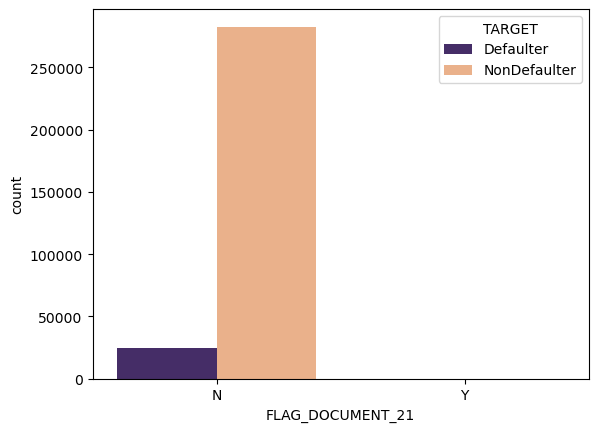

In [15]:
sns.countplot(data=flag_df,x="FLAG_DOCUMENT_21",hue='TARGET', palette=['#432371',"#FAAE7B"])  

- We can see neither the Defaulters nor the Non-Defaulters had submitted 'FLAG_DOCUMENT_21'. Let us  check the same for other flag columns:

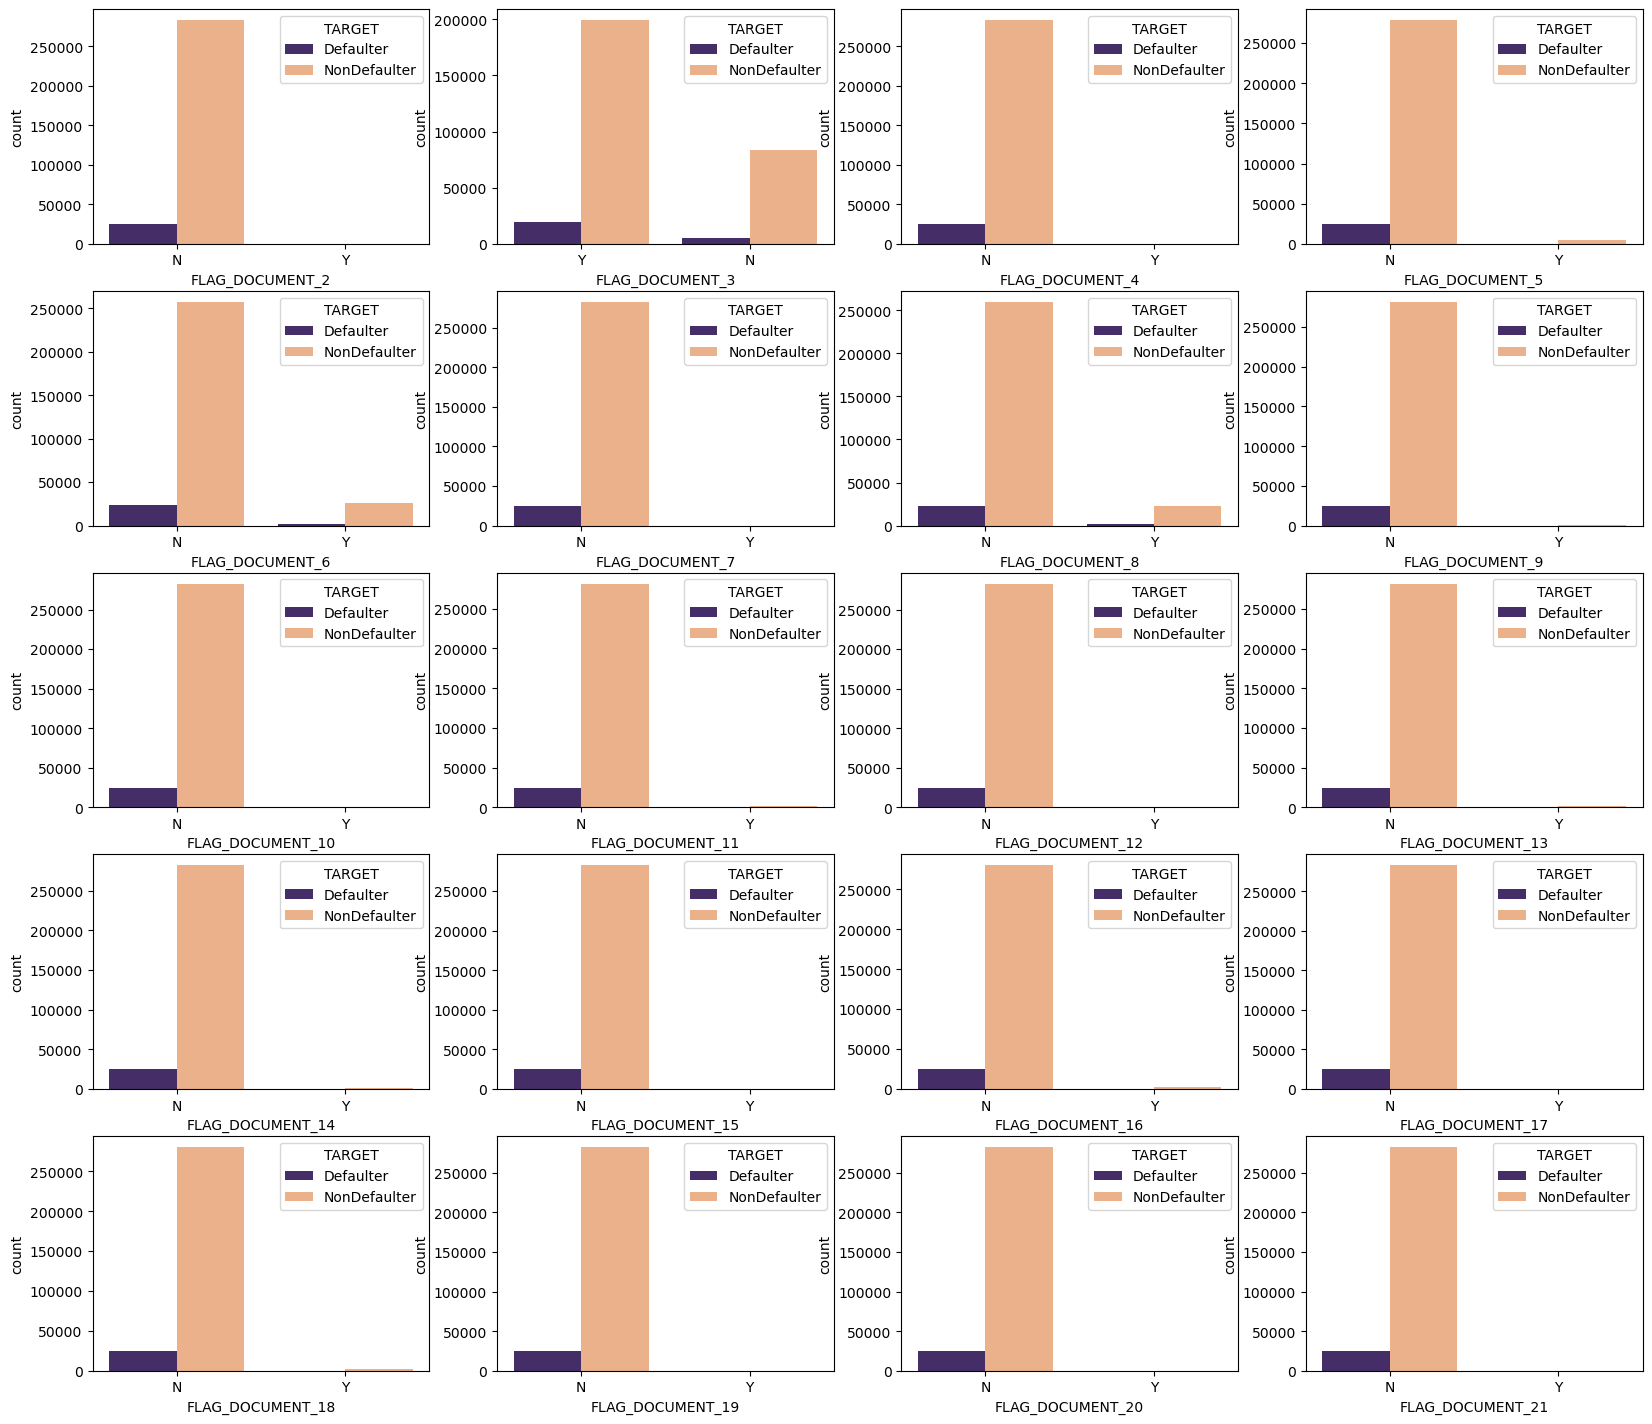

In [16]:
plt.figure(figsize=(20,25))
for i,col in enumerate(flag_doc_columns):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_df,x=col,hue='TARGET', palette=['#432371',"#FAAE7B"])

- Except flag document 3 , 6 and 8  none of the docs are submitted. So we can delete the documents columns except doc 3, 8, 6 Lets see about other flag columns

In [17]:
flag_corrleation_cols= [ 
'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL','TARGET']

application_df[flag_corrleation_cols].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [18]:
flag_correlation_df= application_df[flag_corrleation_cols]
flag_correlation_df.FLAG_OWN_CAR = flag_correlation_df.FLAG_OWN_CAR.replace({"Y":1, "N":0})
flag_correlation_df.FLAG_OWN_REALTY = flag_correlation_df.FLAG_OWN_REALTY.replace({"Y":1, "N":0})
flag_correlation_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,0,1,1,1,0,1,1,0,1
1,0,0,1,1,0,1,1,0,0
2,1,1,1,1,1,1,1,0,0
3,0,1,1,1,0,1,0,0,0
4,0,1,1,1,0,1,0,0,0


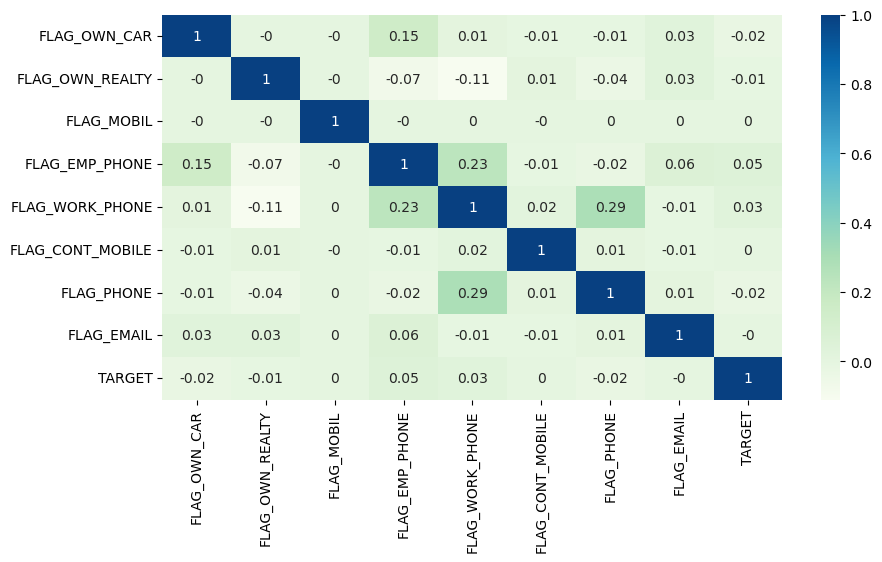

In [19]:
# plotting the correlation of other flag columns in a heatmap to understand their correlation
flag_correlation_df_1=round(flag_correlation_df.corr(),2)
flag_correlation_df_1
plt.figure(figsize=(10,5))
sns.heatmap(flag_correlation_df_1,cmap="GnBu",annot=True)
plt.show()

- We can see from the heatmap that none of the correlation values are significant enough to be considered, the plot displays low correlation values except for self.Hence we can consider to drop these flag columns as well.

In [20]:
flag_columns_to_drop=[
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

application_df.drop(flag_columns_to_drop,axis =1,inplace=True)
application_df.shape

(307511, 48)

- After dropping most of the flag columns , we can see that the dataset has 48 columns left.

### 2.3 Missing value Imputation

- For imputing the missing values ,lets look at the null value column percentage again

In [21]:
null_percentage_by_columns= null_values_percent(application_df)
null_percentage_by_columns

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_8                 0.00
ORGANIZATION_TYPE               0.00
LIVE_CITY_NOT_WORK_CITY         0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
SK_ID_CURR                      0.00
R

- OCCUPATION_TYPE column is having the highest percentage of null values, let us have a look at the different values of occupation

In [22]:
# Occupation type
application_df["OCCUPATION_TYPE"].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

- The highest percentage value of occupation type is 'Laborers' which is still lower than the null value percentage. Let us  fill the null values with "Unknown"/"Missing" as filling with mode value might introduce discrepancies in our analysis

In [23]:
application_df["OCCUPATION_TYPE"] = application_df["OCCUPATION_TYPE"].fillna("Unknown")
application_df["OCCUPATION_TYPE"].isnull().sum()

0

- The next column having highest percentage of null values is "EXT_SOURCE_3".Lets check the statitical data and box plot for the columns before imputing the null values.

In [24]:
application_df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

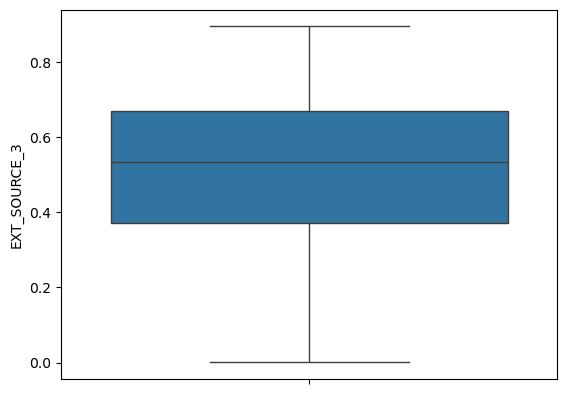

In [25]:
sns.boxplot(application_df["EXT_SOURCE_3"])
plt.show()

- We can see the mean and median values are almost similar, and also from the box plot we can see there are no outliers.So we can fill the missing values with mean.Let us check the same for EXT_SOURCE_2 column next.

In [26]:
EXT_SOURCE_3_mean = application_df['EXT_SOURCE_3'].mean()
EXT_SOURCE_3_mean

0.5108529061799658

In [27]:
application_df['EXT_SOURCE_3'] = application_df['EXT_SOURCE_3'].fillna(EXT_SOURCE_3_mean)
application_df['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

<Axes: ylabel='EXT_SOURCE_2'>

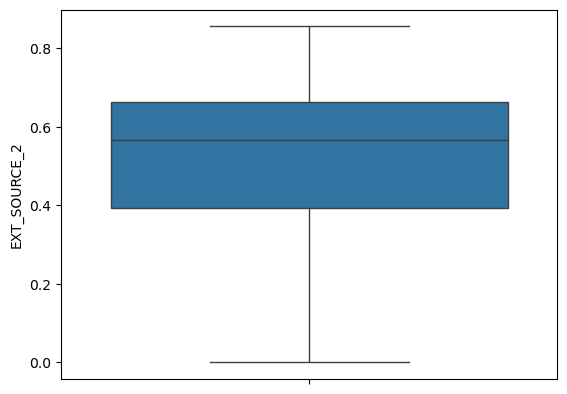

In [28]:
sns.boxplot(application_df['EXT_SOURCE_2'])

- Once again ,we can see the mean and median values are almost similar, and also from the box plot we can see there are no outliers.So we can fill the missing values with mean.

In [29]:
EXT_SOURCE_2_mean = application_df['EXT_SOURCE_2'].mean()
application_df['EXT_SOURCE_2'] = application_df['EXT_SOURCE_2'].fillna(EXT_SOURCE_2_mean)

- Let us check the remaining columns for null percentage again

In [30]:
null_percentage_by_columns= null_values_percent(application_df)
null_percentage_by_columns

AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
REG_REGION_NOT_WORK_REGION      0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_6                 0.00
EXT_SOURCE_3                    0.00
EXT_SOURCE_2                    0.00
FLAG_DOCUMENT_8                 0.00
ORGANIZATION_TYPE               0.00
LIVE_CITY_NOT_WORK_CITY         0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
SK_ID_CURR                      0.00
R

- Let us focus on the 'AMT_REQ_CREDIT_BUREAU_' columns next.Let us start with 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [31]:
application_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

In [32]:
application_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [33]:
application_df.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [34]:
application_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [35]:
application_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [36]:
application_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

- From the above results we can see for the 'AMT_REQ_CREDIT_BUREAU_%' columns the maximum occurring value is 0. From the definition of the columns, we can see it is Number of enquiries to Credit Bureau about the client.So it is safe to impute mode  value 0 in missing values assuming no enquiries were made.

In [37]:
for col in application_df.columns:
    if 'AMT_REQ_CREDIT_BUREAU_' in col:
         application_df[col].fillna(application_df[col].mode()[0],inplace=True)
       


null_percentage_by_columns= null_values_percent(application_df)
null_percentage_by_columns

NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.00
EXT_SOURCE_3                   0.00
SK_ID_CURR                     0.00
REG_REGION_NOT_WORK_REGION     0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_8                0.00
AMT_REQ_CREDIT_BUREAU_HOUR     0.00
AMT_REQ_CREDIT_BUREAU_DAY      0.00
AMT_REQ_CREDIT_BUREAU_WEEK     0.00
AMT_REQ_CREDIT_BUREAU_MON      0.00
AMT_REQ_CREDIT_BUREAU_QRT      0.00
LIVE_REGION_NOT_WORK_REGION    0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

In [38]:
application_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()


OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: count, dtype: int64

In [39]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


- Next let us take a look at the %_CNT_SOCIAL_CIRCLE columns and impute them

In [40]:
application_df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

In [41]:
social_cols=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

for col in social_cols:
    application_df[col]=application_df[col].fillna(application_df[col].mode()[0])

null_percentage_by_columns= null_values_percent(application_df)
null_percentage_by_columns

NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
OBS_60_CNT_SOCIAL_CIRCLE       0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.00
EXT_SOURCE_3                   0.00
OBS_30_CNT_SOCIAL_CIRCLE       0.00
DEF_30_CNT_SOCIAL_CIRCLE       0.00
SK_ID_CURR                     0.00
DEF_60_CNT_SOCIAL_CIRCLE       0.00
REG_REGION_NOT_WORK_REGION     0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_8                0.00
AMT_REQ_CREDIT_BUREAU_HOUR     0.00
AMT_REQ_CREDIT_BUREAU_DAY      0.00
AMT_REQ_CREDIT_BUREAU_WEEK     0.00
AMT_REQ_CREDIT_BUREAU_MON      0.00
AMT_REQ_CREDIT_BUREAU_QRT      0.00
LIVE_REGION_NOT_WORK_REGION    0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

- Next, let us impute  at the NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS as from definition of the columns it looks like they are important columns to be considered for the analysis

In [42]:
application_df.NAME_TYPE_SUITE.isnull().sum()

1292

In [43]:
application_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

- We can see the maximum % of NAME_TYPE_SUITE is 'Unaccompanied' which is 81% , so we can impute the missing values using the mode

In [44]:
mode=application_df.NAME_TYPE_SUITE.mode()[0]
application_df.NAME_TYPE_SUITE=application_df.NAME_TYPE_SUITE.fillna(mode)
application_df.NAME_TYPE_SUITE.isnull().sum()

0

In [45]:
application_df[['AMT_GOODS_PRICE']].isnull().sum()
application_df[['AMT_GOODS_PRICE']].agg(['min','max','median'])


,AMT_GOODS_PRICE
min,40500.0
max,4050000.0
median,450000.0


In [46]:
application_df[['AMT_GOODS_PRICE']].mean()  # mean is too high

AMT_GOODS_PRICE    538396.207429
dtype: float64

- For 'AMT_GOODS_PRICE' we see that the mean is too high and the difference between mean and median is also huge. So we will impute the missing value with median for this column.

In [47]:
application_df[['AMT_GOODS_PRICE']]=application_df[['AMT_GOODS_PRICE']].fillna(application_df[['AMT_GOODS_PRICE']].median())
application_df[['AMT_GOODS_PRICE']].isnull().sum()

AMT_GOODS_PRICE    0
dtype: int64

- Next , let us look at the 'AMT_ANNUITY' column

In [48]:
application_df[['AMT_ANNUITY']].isnull().sum()
application_df[['AMT_ANNUITY']].describe()

,AMT_ANNUITY
count,307499.000000
mean,27108.573909
std,14493.737315
min,1615.500000
25%,16524.000000
50%,24903.000000
75%,34596.000000
max,258025.500000


In [49]:
# The mean and median are close , so we will impute the missing values with mean here.
application_df[['AMT_ANNUITY']]=application_df[['AMT_ANNUITY']].fillna(application_df[['AMT_ANNUITY']].mean())
application_df[['AMT_ANNUITY']].isnull().sum()

AMT_ANNUITY    0
dtype: int64

In [50]:
#application_df[['CNT_FAM_MEMBERS']].isnull().sum()
application_df[['CNT_FAM_MEMBERS']].value_counts()

CNT_FAM_MEMBERS
2.0                158357
1.0                 67847
3.0                 52601
4.0                 24697
5.0                  3478
6.0                   408
7.0                    81
8.0                    20
9.0                     6
10.0                    3
12.0                    2
14.0                    2
16.0                    2
20.0                    2
11.0                    1
13.0                    1
15.0                    1
Name: count, dtype: int64

In [51]:
# For CNT_FAM_MEMBERS we will impute the missing values with mode.

application_df[['CNT_FAM_MEMBERS']]=application_df[['CNT_FAM_MEMBERS']].fillna(application_df['CNT_FAM_MEMBERS'].mode()[0])
application_df[['CNT_FAM_MEMBERS']].isnull().sum()

CNT_FAM_MEMBERS    0
dtype: int64

### 2.4 Data Standardisation 

- Now , let us focus on standardising the data and detecting the outliers. Initially we had seen that the days columns were having some negative values which look incorrect.Lets have a close look at the days columns and fix them.

In [52]:
days=[]
for col in application_df.columns:
    if col.startswith('DAYS'):
        days.append(col)
days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [53]:
application_df[days].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


- Let us replace the negative values with their absolute values as negative values for days donot make any sense and might affect our analysis

In [54]:
for col in days:
    application_df[col]=abs(application_df[col])

#application_df.head()

In [55]:
application_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0,0,1,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,Unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.510853,2.0,0.0,2.0,0.0,1673.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- Let us also take a look values of the column 'CODE_GENDER'.We can see a very small number of rows are having XNA value, lets replace that with the mode.

In [56]:
application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [57]:
application_df['CODE_GENDER'] = application_df['CODE_GENDER'].replace('XNA','F')

In [58]:
application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### 2.5 Outlier Detection & Binning

- Next let us look for outliers in the given dataset.We will also try to bin the values where there are outliers.Lets us take a look at the shape, types and unique values of the columns. A very high number of unique values would indicate there are some outliers in the dataset.

In [59]:
application_df.shape

(307511, 48)

In [60]:
application_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGIO

In [61]:
application_df.nunique().sort_values()

FLAG_DOCUMENT_6                     2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_8                     2
LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN

- Here, the last 10 columns ' are having very high unique values, which indicates there are some outliers.We will not consider SK_ID_CURR as that is an ID field.  We will apply binning to the remaining  columns.For each column we will check the percentile distrbutions,min,max.We will also try to see the outliers using boxplot,finally we will add an additional column which will indicate the range the value falls into.Let us see it first for AMT_GOODS_PRICE.

In [62]:
application_df["AMT_GOODS_PRICE"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1     180000.0
0.2     225000.0
0.3     270000.0
0.4     378000.0
0.5     450000.0
0.6     522000.0
0.7     675000.0
0.8     814500.0
0.9    1093500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [63]:
application_df["AMT_GOODS_PRICE"].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE'>

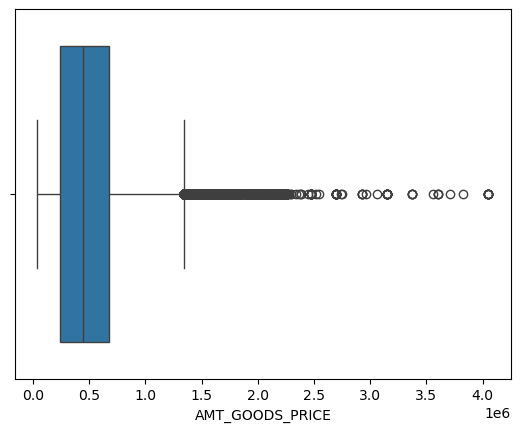

In [64]:
sns.boxplot(data=application_df,x="AMT_GOODS_PRICE")

- Since the values are over a lakh, let us divid the values by 100000.We will create bins and  AMT_GOODS_PRICE_RANGE column would indicate which bin a particular value belongs to.This would make it easier for us to understand the data distribution.

In [65]:
application_df['AMT_GOODS_PRICE']=application_df['AMT_GOODS_PRICE']/100000
application_df['AMT_GOODS_PRICE'].value_counts()


AMT_GOODS_PRICE
4.500000     26300
2.250000     25282
6.750000     24962
9.000000     15416
2.700000     11428
             ...  
12.657510        1
5.032665         1
8.107785         1
6.660900         1
7.438635         1
Name: count, Length: 1002, dtype: int64

In [66]:
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_df['AMT_GOODS_PRICE_RANGE']=pd.cut(application_df['AMT_GOODS_PRICE'],bins=bins,labels=labels)
application_df['AMT_GOODS_PRICE_RANGE'].value_counts()

AMT_GOODS_PRICE_RANGE
2L-3L        62761
4L-5L        57251
6L-7L        40024
10L Above    34119
1L-2L        32956
8L-9L        21484
3L-4L        21219
5L-6L        13117
0-1L          8709
7L-8L         8110
9L-10L        7761
Name: count, dtype: int64

- We repeat the same process for AMOUNT INCOME TOTAL,AMT_CREDIT

In [67]:
application_df["AMT_INCOME_TOTAL"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1     81000.0
0.2     99000.0
0.3    112500.0
0.4    135000.0
0.5    147150.0
0.6    162000.0
0.7    180000.0
0.8    225000.0
0.9    270000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [68]:
application_df["AMT_INCOME_TOTAL"].max()

117000000.0

In [69]:
application_df['AMT_INCOME_TOTAL']=application_df['AMT_INCOME_TOTAL']/100000



In [70]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=labels)

In [71]:
application_df['AMT_INCOME_RANGE'].value_counts()

AMT_INCOME_RANGE
1L-2L        155898
2L-3L         65176
0-1L          63698
3L-4L         14676
4L-5L          5361
5L-6L          1095
6L-7L           869
8L-9L           298
7L-8L           162
9L-10L           28
10L Above        18
Name: count, dtype: int64

In [72]:
# AMOUNT CREDIT

In [73]:
application_df["AMT_CREDIT"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1     180000.0
0.2     254700.0
0.3     306306.0
0.4     432000.0
0.5     513531.0
0.6     604152.0
0.7     755190.0
0.8     900000.0
0.9    1133748.0
Name: AMT_CREDIT, dtype: float64

In [74]:
application_df["AMT_CREDIT"].max()

4050000.0

In [75]:
application_df['AMT_CREDIT']=application_df['AMT_CREDIT']/100000
application_df['AMT_CREDIT'].value_counts()


AMT_CREDIT
4.500000     9709
6.750000     8877
2.250000     8162
1.800000     7342
2.700000     7241
             ... 
4.873185        1
6.304005        1
18.752760       1
13.958955       1
13.911300       1
Name: count, Length: 5603, dtype: int64

In [76]:
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=labels)
application_df['AMT_CREDIT_RANGE'].value_counts()

AMT_CREDIT_RANGE
2L-3L        54813
10L Above    49985
5L-6L        34232
4L-5L        32038
1L-2L        30140
3L-4L        26338
6L-7L        24049
8L-9L        21792
7L-8L        19193
9L-10L        8927
0-1L          6004
Name: count, dtype: int64

- For DAYS_BIRTH let us create an age column from it and we will create a separate AGE_GROUP column as well

In [77]:
application_df["DAYS_BIRTH"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1    10284.0
0.2    11694.0
0.3    13140.0
0.4    14416.0
0.5    15750.0
0.6    17220.0
0.7    18885.0
0.8    20474.0
0.9    22181.0
Name: DAYS_BIRTH, dtype: float64

In [78]:
application_df["DAYS_BIRTH"].max()

25229

In [79]:
application_df["AGE"] = application_df["DAYS_BIRTH"]/365
application_df["AGE"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])


0.1    28.175342
0.2    32.038356
0.3    36.000000
0.4    39.495890
0.5    43.150685
0.6    47.178082
0.7    51.739726
0.8    56.093151
0.9    60.769863
Name: AGE, dtype: float64

In [80]:
bins = [0,20,25,30,35,40,45,50,55,60,100]
labels = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

application_df["AGE_GROUP"] = pd.cut(application_df["AGE"], bins=bins, labels=labels)
application_df["AGE_GROUP"].value_counts()

AGE_GROUP
35-40       42868
40-45       41406
30-35       39440
60 Above    35579
45-50       35135
50-55       34942
55-60       33120
25-30       32862
20-25       12159
0-20            0
Name: count, dtype: int64

- Similarly we create 'YEARS_EMPLOYED' and 'YEARS_ID_PUBLISH' from 'DAYS_EMPLOYED' and 'DAYS_ID_PUBLISH'.We also apply binning to them.

In [81]:
application_df["DAYS_EMPLOYED"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1       392.0
0.2       749.0
0.3      1132.0
0.4      1597.0
0.5      2219.0
0.6      3032.0
0.7      4435.0
0.8      9188.0
0.9    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [82]:
application_df["DAYS_EMPLOYED"].max()

365243

In [83]:
application_df["YEARS_EMPLOYED"] = application_df["DAYS_EMPLOYED"]/365


In [84]:
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

application_df["EMPLOYEMENT_YEARS"] = pd.cut(application_df["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [85]:
application_df["EMPLOYEMENT_YEARS"].value_counts()

EMPLOYEMENT_YEARS
0-5         136309
5-10         64872
10-15        27549
15-20        10849
20-25         6243
25-30         3308
30 Above      3005
Name: count, dtype: int64

In [86]:
application_df["DAYS_ID_PUBLISH"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1     730.0
0.2    1378.0
0.3    2044.0
0.4    2654.0
0.5    3254.0
0.6    3881.0
0.7    4172.0
0.8    4430.0
0.9    4724.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [87]:
application_df["DAYS_ID_PUBLISH"].max()

7197

In [88]:
application_df["YEARS_ID_PUBLISH"] = application_df["DAYS_ID_PUBLISH"]/365
application_df["YEARS_ID_PUBLISH"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])


0.1     2.000000
0.2     3.775342
0.3     5.600000
0.4     7.271233
0.5     8.915068
0.6    10.632877
0.7    11.430137
0.8    12.136986
0.9    12.942466
Name: YEARS_ID_PUBLISH, dtype: float64

In [89]:
application_df["YEARS_ID_PUBLISH"].max()

19.71780821917808

In [90]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,20]
lables = ["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10-11","11-12","12 Above"]

application_df["YEARS_ID_PUBLISH_RANGE"] = pd.cut(application_df["YEARS_ID_PUBLISH"], bins=bins, labels=lables)
application_df["YEARS_ID_PUBLISH_RANGE"].value_counts()

YEARS_ID_PUBLISH_RANGE
12 Above    67330
11-12       44276
10-11       21390
7-8         19219
9-10        19189
8-9         18645
6-7         18452
2-3         17400
5-6         17193
3-4         17037
4-5         16595
1-2         15842
0-1         14927
Name: count, dtype: int64

In [91]:
application_df["AMT_ANNUITY"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9])

0.1    11074.5
0.2    14701.5
0.3    18189.0
0.4    21870.0
0.5    24903.0
0.6    28062.0
0.7    32004.0
0.8    37516.5
0.9    45954.0
Name: AMT_ANNUITY, dtype: float64

 - Lastly , we apply the same conversion to AMT_ANNUITY.

In [92]:
application_df["AMT_ANNUITY"].max()

258025.5

In [93]:
application_df["AMT_ANNUITY"].max()

258025.5

In [94]:
bins = [0,10000,15000,20000,25000,30000,35000,40000,45000,260000]
lables = ["0-10K","10K-15K","15K-20K","20K-25K","25K-30K","30K-35K","35K-40K","40K-45K","45K Above"]
application_df["AMT_ANNUITY_RANGE"] = pd.cut(application_df["AMT_ANNUITY"], bins=bins, labels=lables)
application_df["AMT_ANNUITY_RANGE"].value_counts()

AMT_ANNUITY_RANGE
20K-25K      48362
25K-30K      44116
15K-20K      42825
10K-15K      40397
30K-35K      33668
45K Above    33199
35K-40K      24894
0-10K        23283
40K-45K      16767
Name: count, dtype: int64

In [95]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,YEARS_ID_PUBLISH,YEARS_ID_PUBLISH_RANGE,AMT_ANNUITY_RANGE
0,100002,1,Cash loans,M,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3L-4L,2L-3L,4L-5L,25.920548,25-30,1.745205,0-5,5.808219,5-6,20K-25K
1,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K
2,100004,0,Revolving loans,M,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,0-1L,1L-2L,52.180822,50-55,0.616438,0-5,6.934247,6-7,0-10K
3,100006,0,Cash loans,F,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,1L-2L,3L-4L,52.068493,50-55,8.326027,5-10,6.676712,6-7,25K-30K
4,100007,0,Cash loans,M,0,1.215,5.130000,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,5L-6L,1L-2L,5L-6L,54.608219,50-55,8.323288,5-10,9.473973,9-10,20K-25K


## 3.Analysis of Application data

### 3.1 Finding top 10 correlarions with target variable

In [96]:

correlation = application_df.corr(numeric_only=True).abs()
target_correlation = correlation['TARGET'].sort_values(ascending=False)
# Drop the correlation with itself (which is always 1)
target_correlation = target_correlation[target_correlation < 1.000000]
top_10_correlations = target_correlation.head(10)
top_10_correlations

EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
AGE                            0.078239
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
YEARS_ID_PUBLISH               0.051457
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

- From the above analysis , we can see the top 10 correlations with the target variables listed

### 3.2 Data imbalance check & Data Imbalance ratio

- Now that missing value handling is done, let us look at data imbalance in the given data set.Let us first look at the TARGET variable which will give us idea of percentage of defaulters and repayers in the total number of data

In [97]:
application_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [176]:
# Data Imbalance ratio
round(len(application_df[application_df.TARGET==0])/len(application_df[application_df.TARGET==1]),2)

11.39

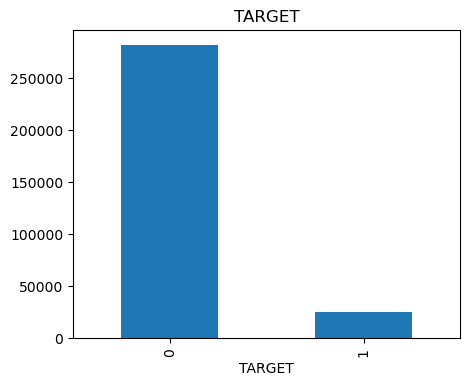

In [98]:
plt.figure(figsize=(5,4))
application_df.TARGET.value_counts().plot(kind = 'bar')
plt.title('TARGET')
plt.show()

- From the above query and bar plot we can see there is imbalance of loan application data, almost 92% of applicants are repayers whereas only 8% are defaulters.Let's check for imbalance in data for gender of the applicants.

In [99]:
application_df.CODE_GENDER.value_counts(normalize = True)*100

CODE_GENDER
F    65.835694
M    34.164306
Name: proportion, dtype: float64

- From the above query , we can see there is an imbalance here as well , almost 65% of applicants are Female  whereas only 34% are male.Lets look at the same data using bar plot

<Axes: xlabel='CODE_GENDER'>

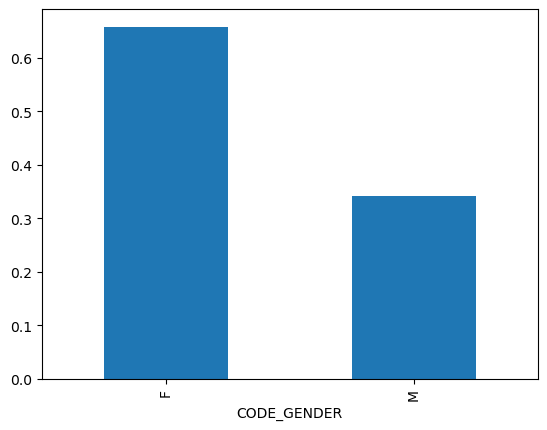

In [100]:
application_df.CODE_GENDER.value_counts(normalize = True).plot.bar()

In [101]:
application_df.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64

- From the above query , we can infer that for almost 90% of the loans are of cash type, whereas only 10% are revolving loans

In [102]:
application_df.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64

- From the above query , we can infer that 70% of the loan applicants have 'Secondary / secondary special' level of education

In [103]:
application_df.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: proportion, dtype: float64

- From the above query , we can infer that 63% of the loan applicants are married , only 14% are single.

In [104]:
application_df.NAME_HOUSING_TYPE.value_counts(normalize = True)*100

NAME_HOUSING_TYPE
House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: proportion, dtype: float64

- From the above query , we can infer that 88% of the loan applicants have a house or an apartment, and only 1% are living on rent.

### 3.3 Categorical Univariate Analysis

- Let us start ahead with univariate analysis of categorical variables, for that first let us check the datatypes of the columns again

In [105]:
application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64


- Let us collect the cetegorical variables in one variable

In [106]:
categorical_vars=application_df.select_dtypes(include=['object']).columns
categorical_vars

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

- First Let us check with the NAME_CONTRACT_TYPE variable

In [107]:
application_df.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

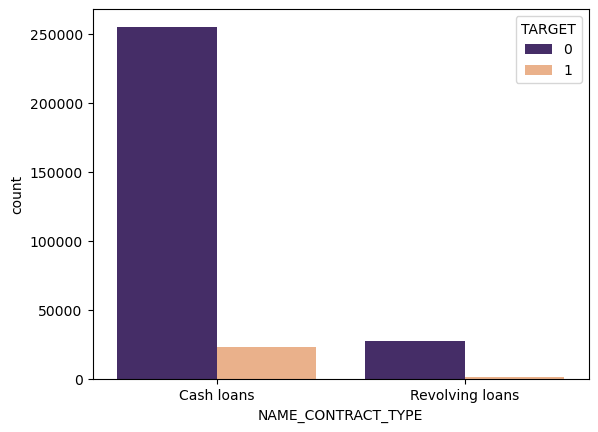

In [108]:
sns.countplot(data=application_df,x='NAME_CONTRACT_TYPE',hue='TARGET',palette=['#432371',"#FAAE7B"])

- Approximately, 250000 Clients of 'cash loans' are non defaulters and around 25000 has defaulted the loan.Let us look for the same data in percentage figures. 

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PERCENTAGE'>

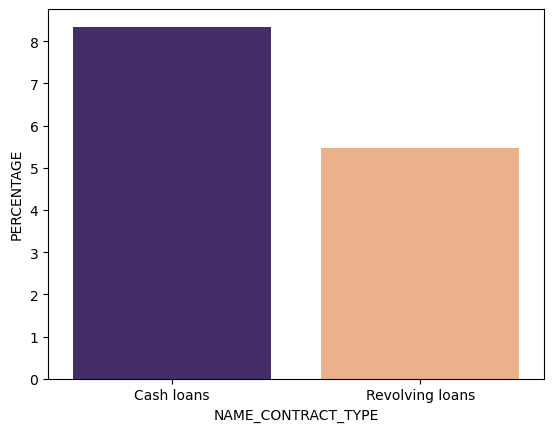

In [109]:
name_contract_type_percentage=application_df[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
name_contract_type_percentage['PERCENTAGE']=name_contract_type_percentage['TARGET']*100
sns.barplot(data=name_contract_type_percentage,x='NAME_CONTRACT_TYPE',y='PERCENTAGE',palette=['#432371',"#FAAE7B"])

- Around 8% of the clients who have taken cash loans have defaulted, whereas around 5.5% of clients who have taken Revolvoing loans have defaulted.
- Now lets see both the plots together.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PERCENTAGE'>

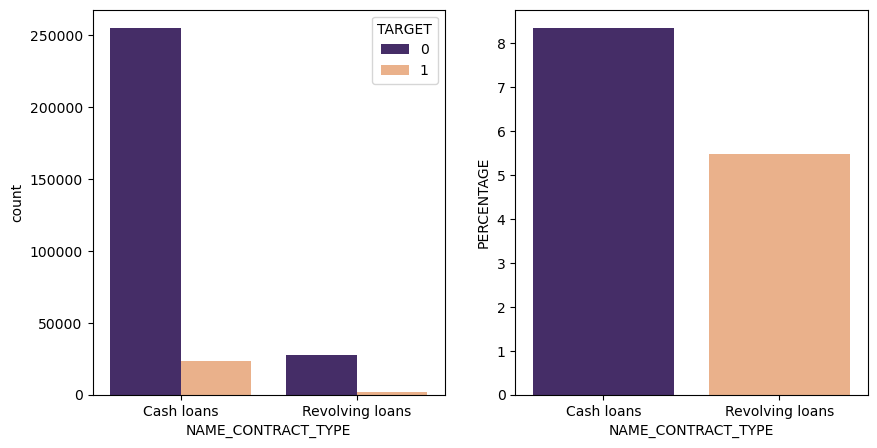

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=application_df,x='NAME_CONTRACT_TYPE',hue='TARGET',palette=['#432371',"#FAAE7B"])
plt.subplot(1,2,2)
sns.barplot(data=name_contract_type_percentage,x='NAME_CONTRACT_TYPE',y='PERCENTAGE',palette=['#432371',"#FAAE7B"])

- This gives us a more clear picture for NAME_CONTRACT_TYPE. Let us try to do the same plots for all the categorical variables.

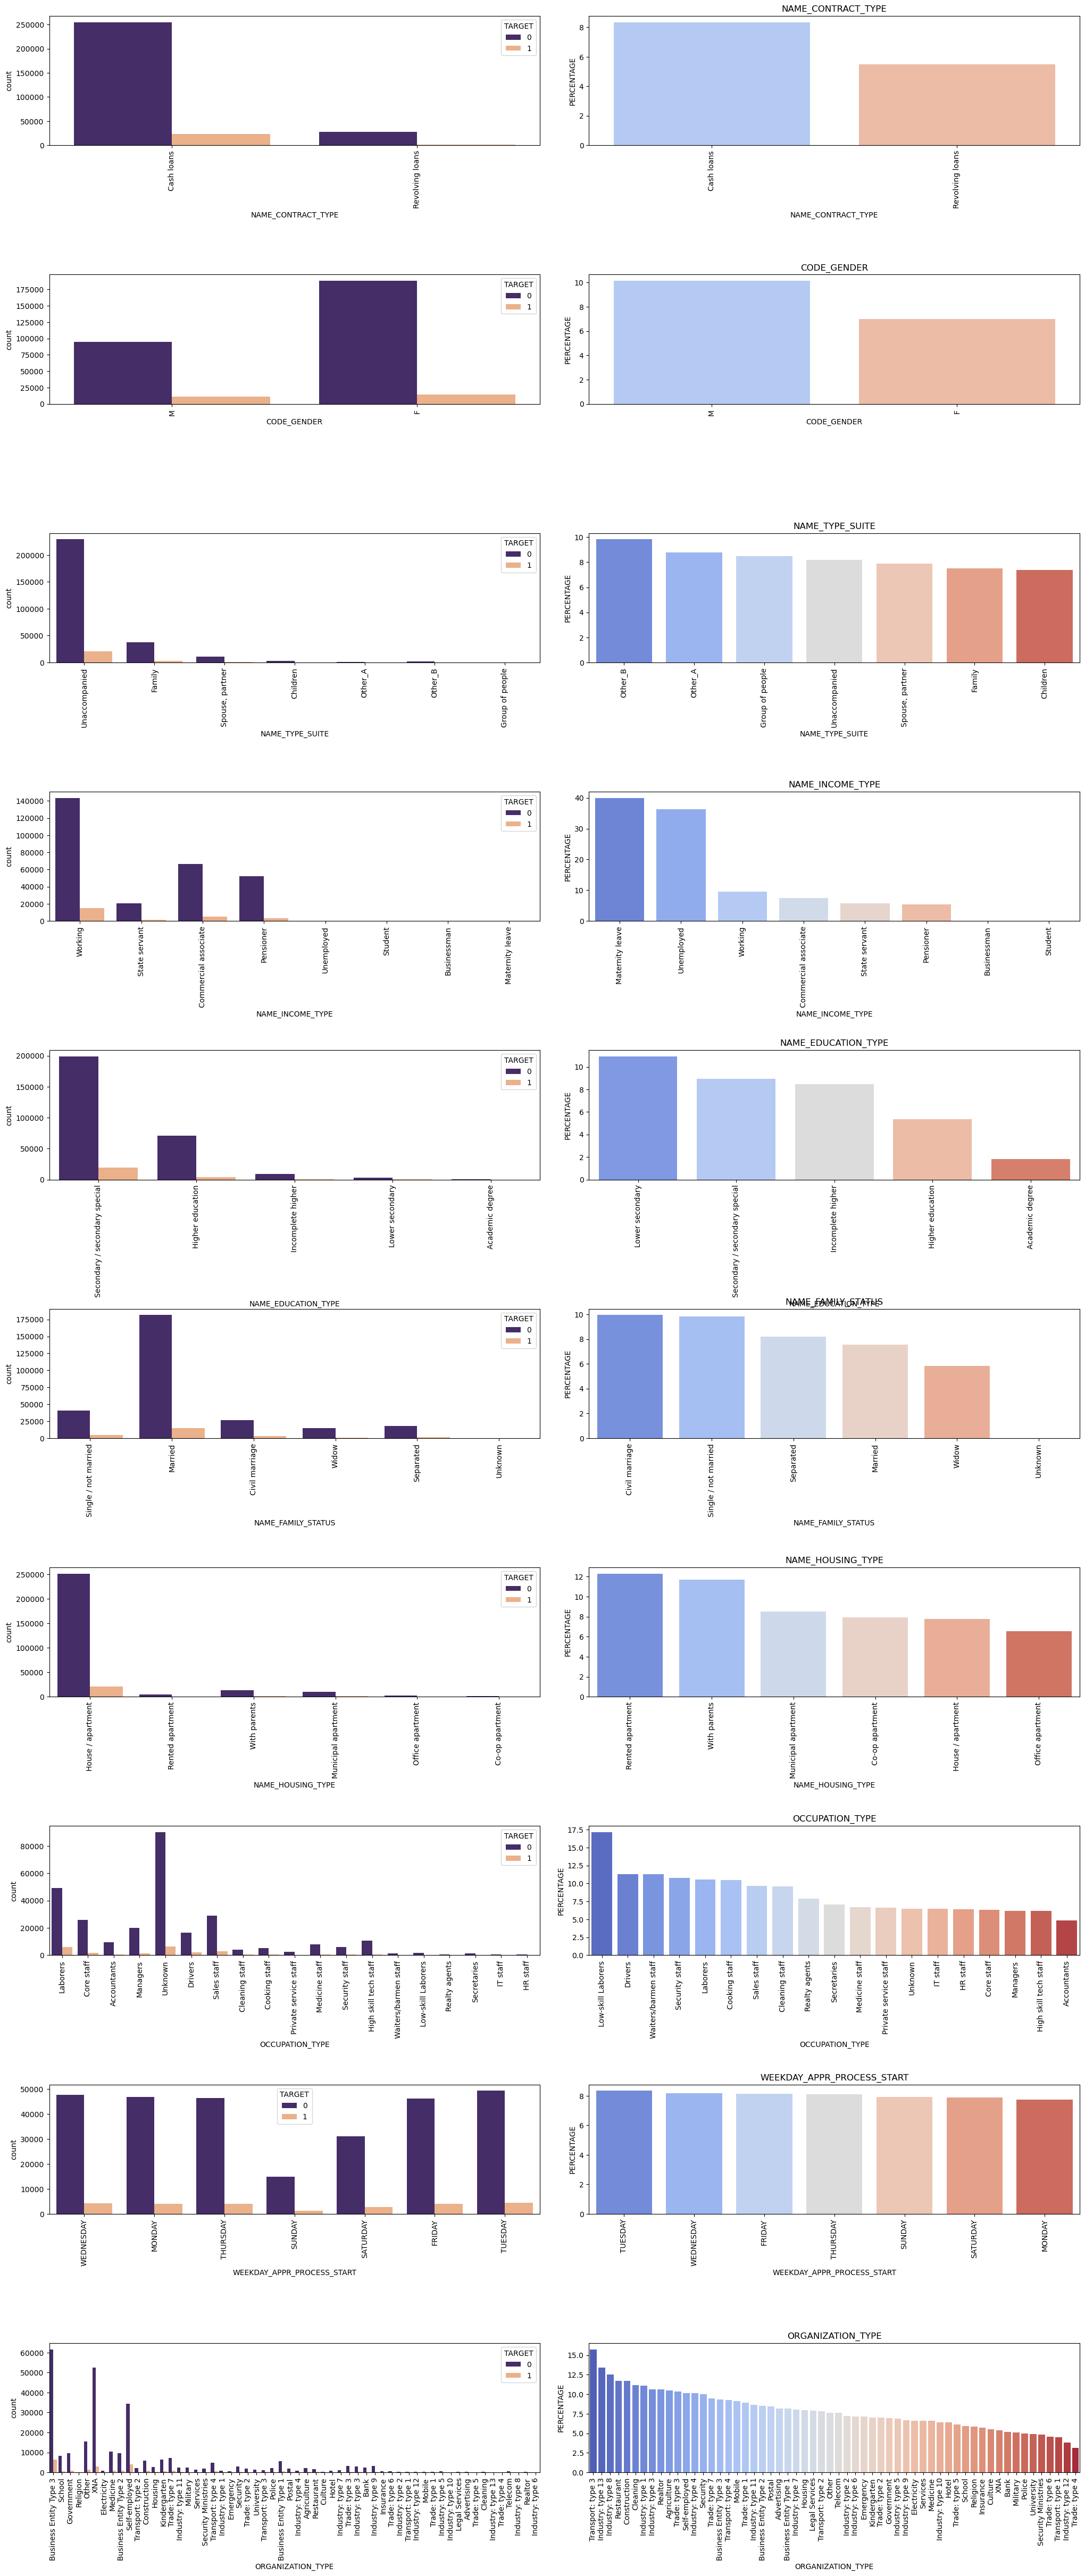

In [111]:



plt.figure(figsize=(25,60))

for i,col in enumerate(categorical_vars):
    col_percentage=application_df[[col,'TARGET']].groupby([col],as_index=False).mean().sort_values(by="TARGET",ascending=False)
    col_percentage['PERCENTAGE']=col_percentage['TARGET']*100
    
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=application_df,x=col,hue='TARGET',palette=['#432371',"#FAAE7B"])
    plt.xticks(rotation=90)
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=col_percentage,x=col,y='PERCENTAGE',palette='coolwarm')
    plt.xticks(rotation=90)  
    plt.title(col)
    


- Here are the observations from the above plots- 
  - NAME_CONTRACT_TYPE : More clients have taken 'cash loan'. People who have taken cash loans are less likely to be defaulter considering the proportion.
  - CODE_GENDER :Females have taken more loans.Females are less likely to be defaulters.
  - NAME_TYPE_SUITE : Most of the people were unaccompanied while taking a loan, defaulting rate is around 9%.'The other B' category has high percentage of defaulters.
    The people accompanied by children are less likely to default, but the number of loans taken is very less.
  - NAME_INCOME_TYPE : Most of the loan were given to working professionals, defaulting rate for working professionals is 10%. The people in maternity leave has high defaulting rate.Pensioners, Commercial Professionals have low default rates.
  - NAME_EDUCATION_TYPE :  Most of the loan were given to Secondary education.Academic degree and Higher education has lowest defauting rate of less than 5%.
  - NAME_FAMILY_STATUS : Most of the loan has been given to married people.Civil marriage has the highest defaulter rate.Married poeple have lower defaulting rate (8%)
  - NAME_HOUSING_TYPE : Most of the loans are given to house owners.Rented people has highest defaulting rate, whereas house owners,office apartment people have lower defaulting rate.
  - OCUPATION_TYPE : Laborers  have taken most of the loans. Low skilled laborers  and drivers have highest default rate. Accountants , Core staff, Managers have low rate of defaulters.
  - WEEKDAY_APPR_PROCESS_START : We can ignore this column as this wont make an impact on our analysis.
  - ORGANIZATION_TYPE : Most of the people who have taken loan are working in 'Business Entity Type 3','Self Employed','Business Entity Type 2'.Transport Type 3 has highest rate of defaulters but number of loans given were low.
    

### 3.4 Numerical Univariate Analysis

- Next lets start with the univariate analysis, lets check the numerical column data first

In [112]:
application_df.dtypes.value_counts()

float64     23
int64       18
object      10
category     3
category     1
category     1
category     1
category     1
Name: count, dtype: int64

- Lets collect all the numerical columns in a variable

In [113]:
numerical_cols=application_df.select_dtypes(include=['float64','int64']).columns
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE

In [114]:

numerical_df=application_df[numerical_cols]
numerical_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH
0,100002,1,0,2.025,4.065975,24700.5,3.510,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,5.808219
1,100003,0,0,2.700,12.935025,35698.5,11.295,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,0.797260
2,100004,0,0,0.675,1.350000,6750.0,1.350,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,6.934247
3,100006,0,0,1.350,3.126825,29686.5,2.970,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.068493,8.326027,6.676712
4,100007,0,0,1.215,5.130000,21865.5,5.130,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,9.473973


- Lets take a look at the numerical data for the defaulters and nondefaulters separately.

In [115]:
defaulters_df=numerical_df[numerical_df['TARGET']==1]
defaulters_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH
0,100002,1,0,2.025,4.065975,24700.5,3.510,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,5.808219
26,100031,1,0,1.125,9.799920,27076.5,7.020,0.018029,18724,2628,6573.0,1827,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,1,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,7.200000,5.005479
40,100047,1,0,2.025,11.935800,35028.0,8.550,0.025164,17482,1262,1182.0,1029,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,3.457534,2.819178
42,100049,1,0,1.350,2.888730,16258.5,2.385,0.007305,13384,3597,45.0,4409,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,9.854795,12.079452
81,100096,1,0,0.810,2.520000,14593.5,2.520,0.028663,24794,365243,5391.0,4199,2.0,2,2,10,0,0,0,0,0,0,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,1000.665753,11.504110


In [116]:
nondefaulters_df=numerical_df[numerical_df['TARGET']==0]
nondefaulters_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH
1,100003,0,0,2.700,12.935025,35698.5,11.295,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,0.797260
2,100004,0,0,0.675,1.350000,6750.0,1.350,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,6.934247
3,100006,0,0,1.350,3.126825,29686.5,2.970,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.068493,8.326027,6.676712
4,100007,0,0,1.215,5.130000,21865.5,5.130,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,9.473973
5,100008,0,0,0.990,4.904955,27517.5,4.545,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,4.350685,1.306849


##### 3.4.1 Previously we had looked at the top 10 correlations with the target variable.Lets check it for defaulters and nondefaulters separately.

In [117]:
defaulters_correlation=defaulters_df.corr()
defaulters_result_corr=defaulters_correlation.where(np.triu(np.ones(defaulters_correlation.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0': 'col1','level_1':'col2',0: 'correlation'})
defaulters_result_corr= defaulters_result_corr[defaulters_result_corr.correlation < 1.00000]
defaulters_result_corr['correlation']=abs(defaulters_result_corr['correlation'])
defaulters_result_corr.sort_values(by='correlation', ascending=False, inplace=True)
defaulters_result_corr.head(15)



,col1,col2,correlation
1608,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
1090,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270
250,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
587,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
494,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
1132,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016
755,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
881,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
251,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
209,AMT_ANNUITY,AMT_CREDIT,0.752195


In [118]:
nondefaulters_correlation=nondefaulters_df.corr()
nondefaulters_result_corr=nondefaulters_correlation.where(np.triu(np.ones(nondefaulters_correlation.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0': 'col1','level_1':'col2',0: 'correlation'})
nondefaulters_result_corr= nondefaulters_result_corr[nondefaulters_result_corr.correlation < 1.00000]
nondefaulters_result_corr['correlation']=abs(nondefaulters_result_corr['correlation'])
nondefaulters_result_corr.sort_values(by='correlation', ascending=False, inplace=True)
nondefaulters_result_corr.head(20)

,col1,col2,correlation
1566,AGE,DAYS_BIRTH,1.000000
1608,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
1090,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510
250,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
587,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
494,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
755,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
1132,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371
881,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
251,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421


In [119]:
defaulters_df=numerical_df[numerical_df['TARGET']==1].drop(['TARGET'],axis=1)
nondefaulters_df=numerical_df[numerical_df['TARGET']==0].drop(['TARGET'],axis=1)

In [120]:
numerical_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH
0,100002,1,0,2.025,4.065975,24700.5,3.510,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,5.808219
1,100003,0,0,2.700,12.935025,35698.5,11.295,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,0.797260
2,100004,0,0,0.675,1.350000,6750.0,1.350,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,6.934247
3,100006,0,0,1.350,3.126825,29686.5,2.970,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.068493,8.326027,6.676712
4,100007,0,0,1.215,5.130000,21865.5,5.130,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,9.473973


- Next , lets analyze the  amount columns 

In [121]:
amount_cols=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','YEARS_EMPLOYED']

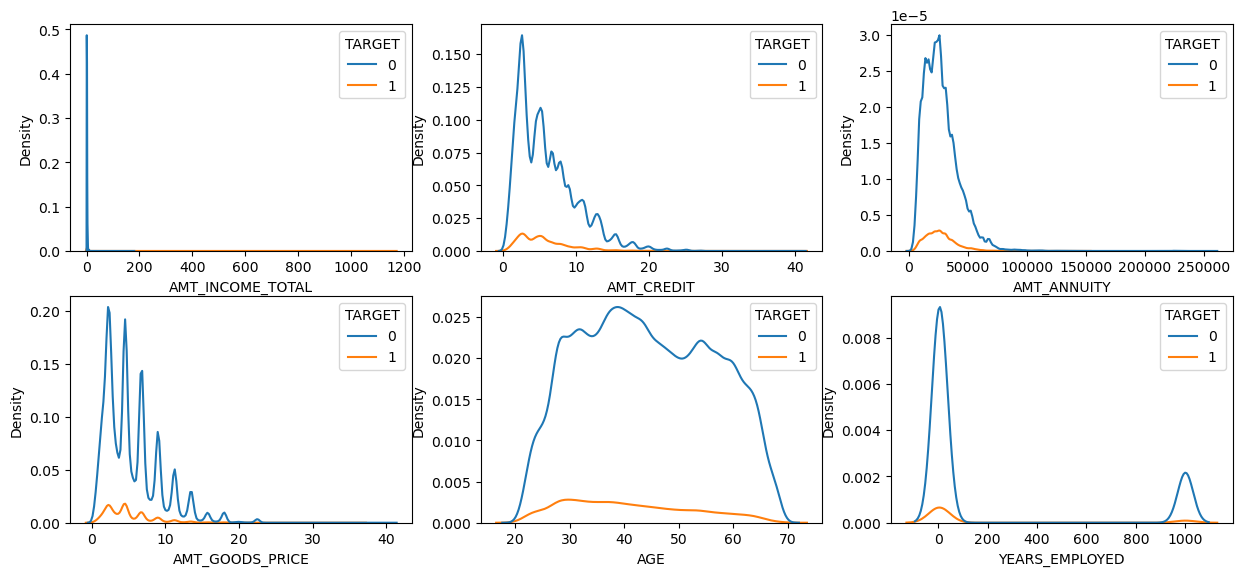

In [122]:
plt.figure(figsize=(15,10))
for i,col in enumerate(amount_cols):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=numerical_df,x=col,hue='TARGET')
   # we had previously converted  'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE' to Lakhs

- Observations: 

  - Most clients have income between 0-1 million
  - Most clients are paying annuity of 0-50,000.
  - Mostly the loans given had product price ranging between 0-1 million.Amount credit also     follows similar curve as expected (0 -1 million)
  - Most clients have age between 20-70 range.
  - There is not much to conclude on the defaulters.

### 3.5 Numerical Bivariate Analysis

- Next we will focus on the bivariate analysis.We will start with the amount columns first.

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

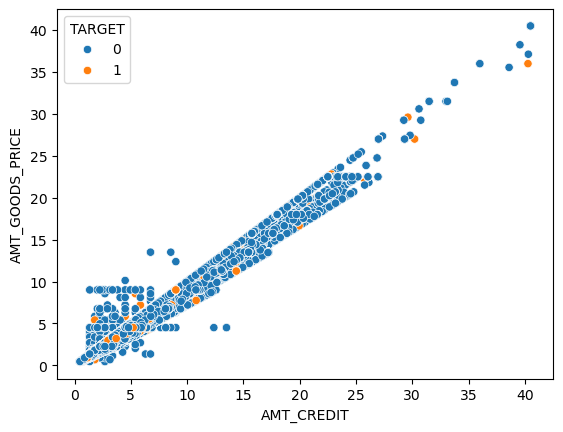

In [123]:
sns.scatterplot(data=numerical_df,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

- As we have seen in univariate also, amount credit follows similar trend as amount goods price.We see here there is a perfect linear correlation.
- Most of the defaulters belong where amount credit is less than 1.5 million

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

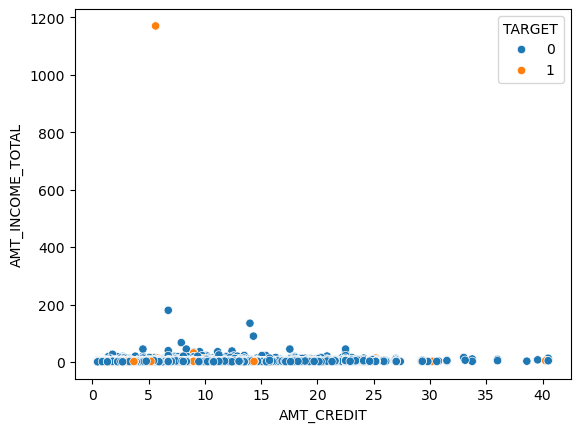

In [124]:
sns.scatterplot(data=numerical_df,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

- People who are earning less are inclined to take loans
- Most of the defaulters belong where amount credit is less than 1.5 million

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

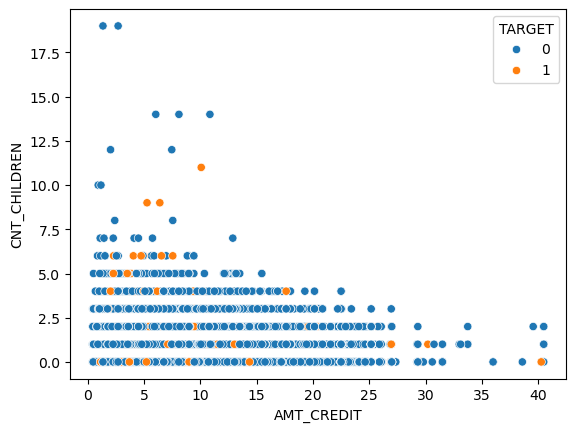

In [125]:
sns.scatterplot(data=numerical_df,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

- People having children 1-3 have low number of defaulters.


- Let us try to check all amount columns with target variable

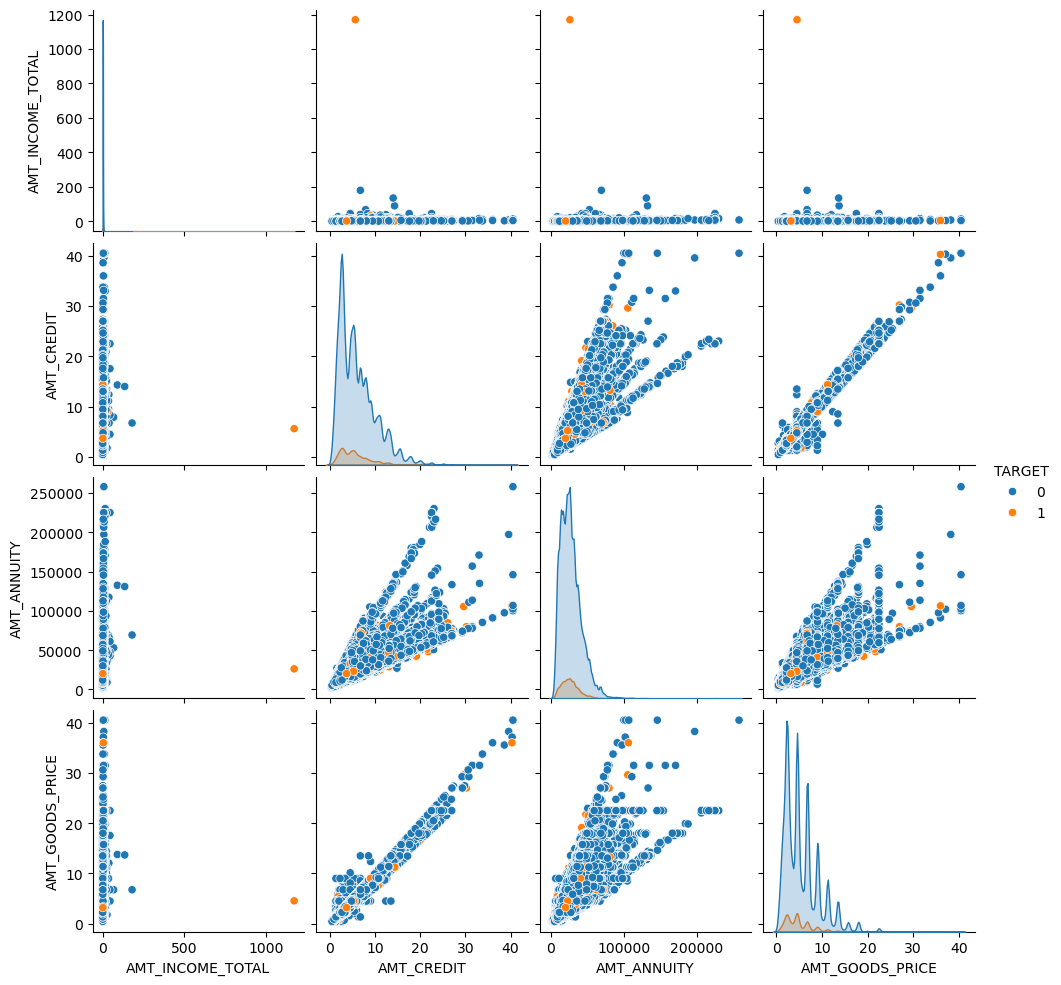

In [126]:

sns.pairplot(data=application_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']],hue='TARGET')


- Amount goods price and Amount credit has liner relation as we have previously seen.
- People who are paying annuity of 100000 are getting credit of around 2 million.This also looks linearly related.
  

- Let us now have at the look at the Continious Variables and check the correlation

In [127]:
continious_df= numerical_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','AGE','TARGET']]
continious_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,AGE,TARGET
0,2.025,4.065975,24700.5,3.510,1.745205,0.262949,0.139376,25.920548,1
1,2.700,12.935025,35698.5,11.295,3.254795,0.622246,0.510853,45.931507,0
2,0.675,1.350000,6750.0,1.350,0.616438,0.555912,0.729567,52.180822,0
3,1.350,3.126825,29686.5,2.970,8.326027,0.650442,0.510853,52.068493,0
4,1.215,5.130000,21865.5,5.130,8.323288,0.322738,0.510853,54.608219,0


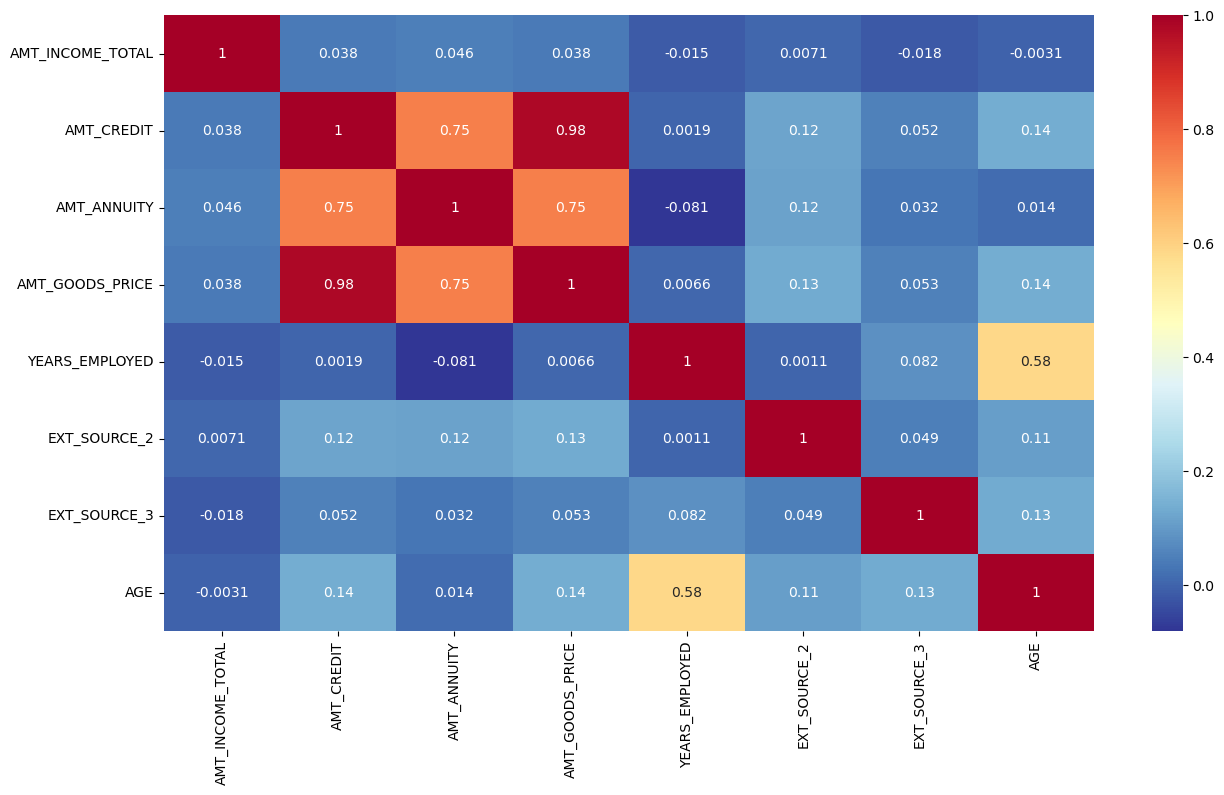

In [128]:
corr_for_defaulters= defaulters_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','AGE']]

plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

- The more the correlated percentage means the high chances of being a defaulter.
  Below are the variables having a high value of correlation: 
  - AMT_CREDIT & AMT_GOODS_PRICE - 0.98 
  - AMT_CREDIT & AMT_ANNUITY - 0.75
  - AMT_GOODS_PRICE & AMT_ANNUITY - 0.75
  - Age & DAYS_EMPLOYED - 0.58

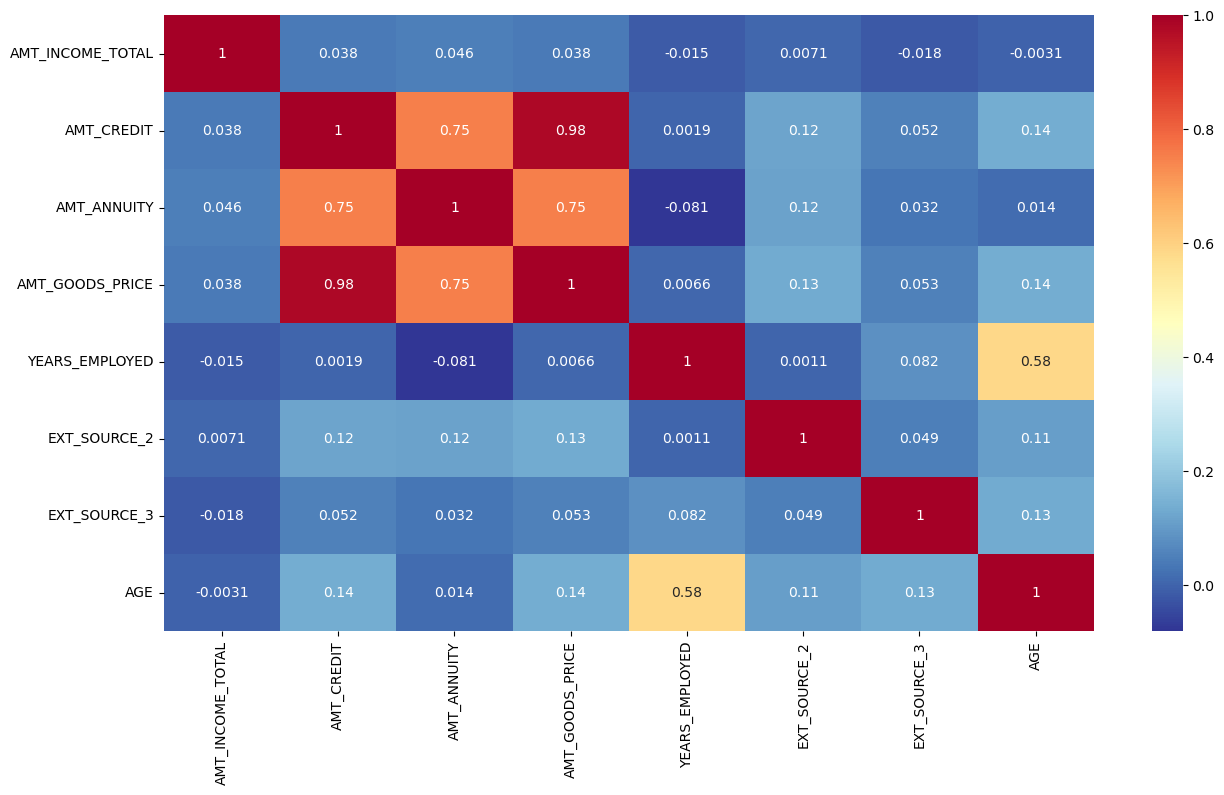

In [129]:
corr_for_non_defaulters = nondefaulters_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','AGE']]

plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

- Similarly for the nondefaulters we can see- 
    - AMT_CREDIT & AMT_GOODS_PRICE - 0.99
    - AMT_CREDIT & AMT_ANNUITY- 0.77
    - AMT_GOODS_PRICE & AMT_ANNUITY - 0.77
    - Age & DAYS_EMPLOYED- 0.63

 We can see, The column relation which are showing higher percentage of correlation in nondefaulters are also  showing in defaulters correlation.   

    

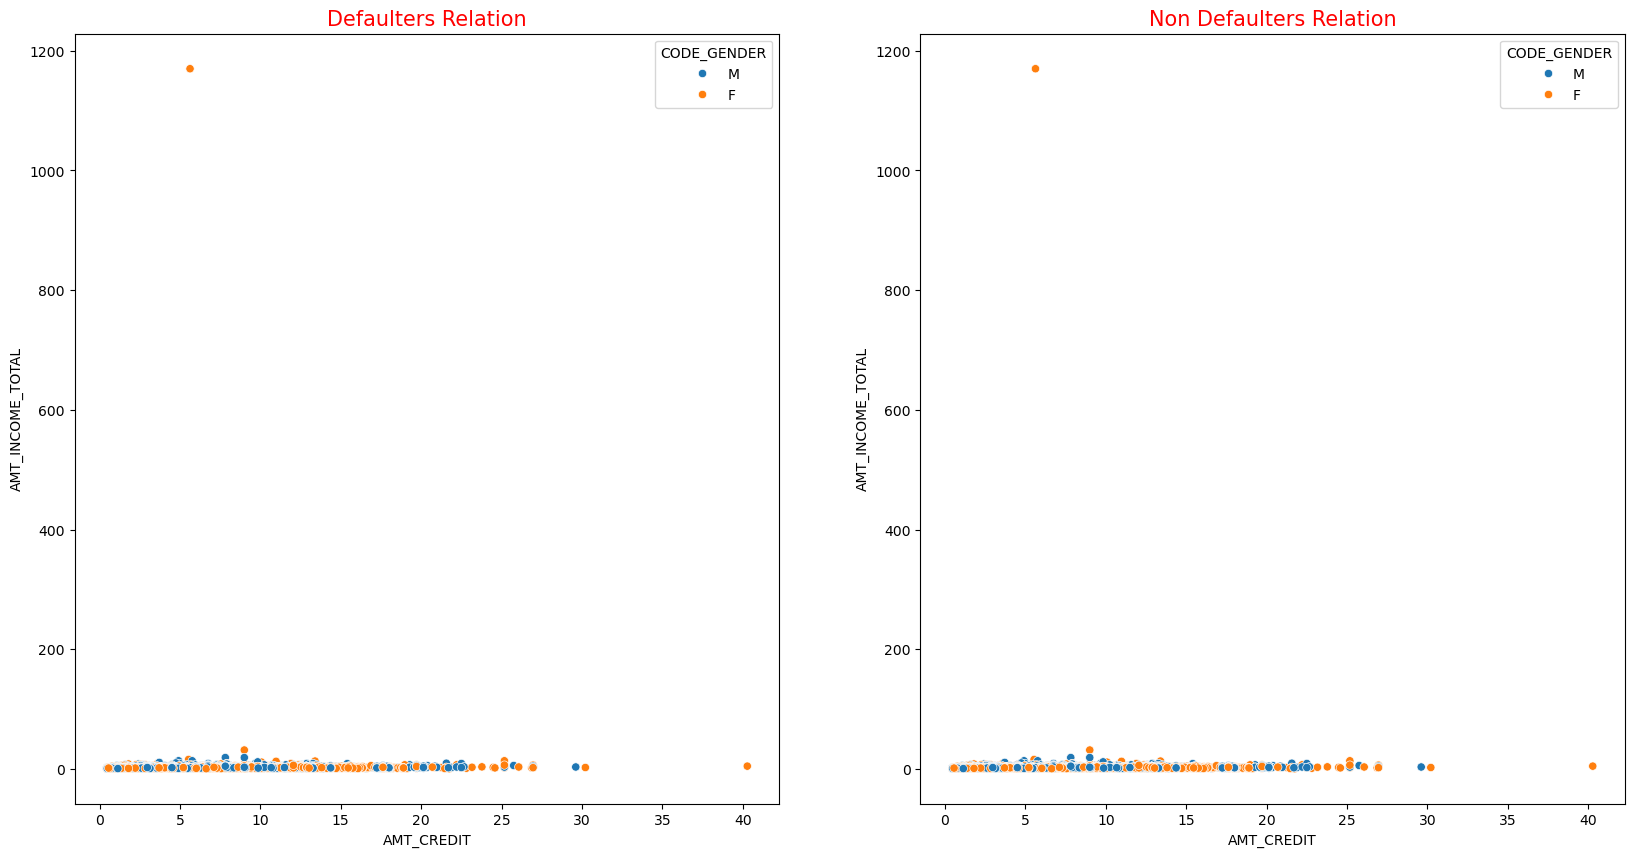

In [130]:
defaulters_df_all=application_df[numerical_df['TARGET']==1].drop(['TARGET'],axis=1)
nondefaulters_df_all=application_df[numerical_df['TARGET']==1].drop(['TARGET'],axis=1)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(x = defaulters_df_all.AMT_CREDIT,y = defaulters_df_all.AMT_INCOME_TOTAL, hue = defaulters_df_all.CODE_GENDER, data = defaulters_df_all)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(x = nondefaulters_df_all.AMT_CREDIT,y = nondefaulters_df_all.AMT_INCOME_TOTAL, hue = nondefaulters_df_all.CODE_GENDER, data = nondefaulters_df_all)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.show()

- From the above scatter plots we can see that for both defaulter and non defaulters values are most congested in the lower ranges.

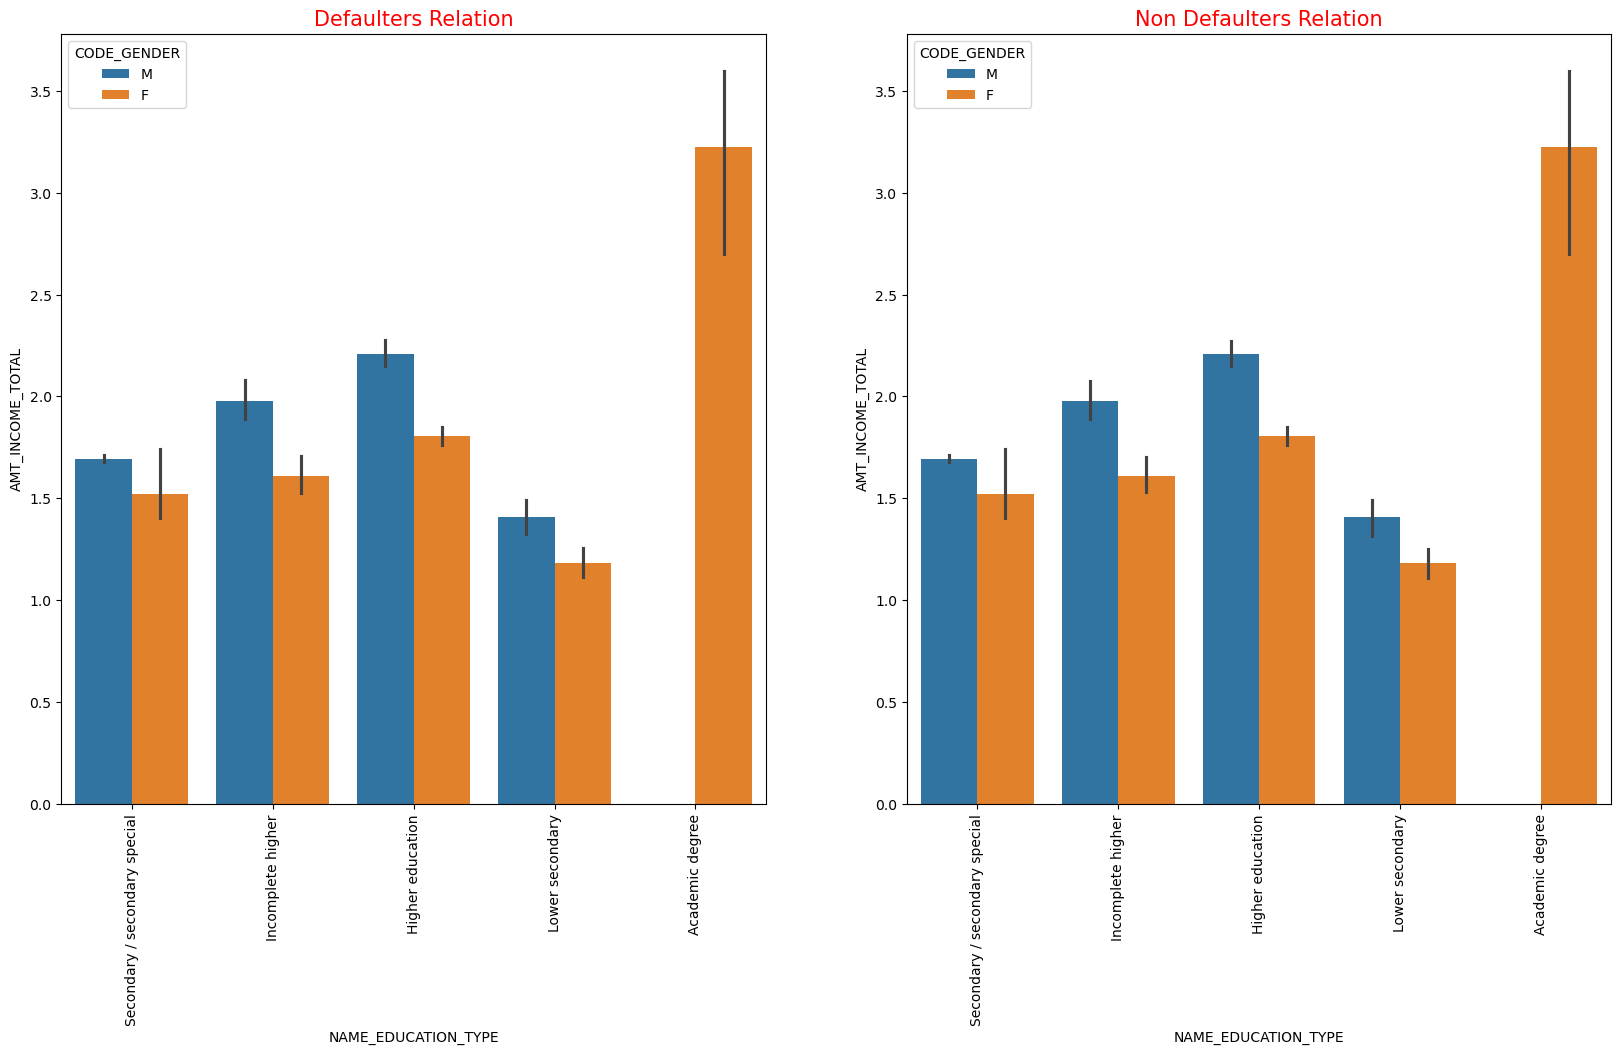

In [131]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x = defaulters_df_all.NAME_EDUCATION_TYPE,y = defaulters_df_all.AMT_INCOME_TOTAL, hue = defaulters_df_all.CODE_GENDER, data = defaulters_df_all)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x = nondefaulters_df_all.NAME_EDUCATION_TYPE,y = nondefaulters_df_all.AMT_INCOME_TOTAL, hue = nondefaulters_df_all.CODE_GENDER, data = nondefaulters_df_all)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

- From the above plots we can see that female academic degree holders are paid highest for both defaulter and nondefaulter category

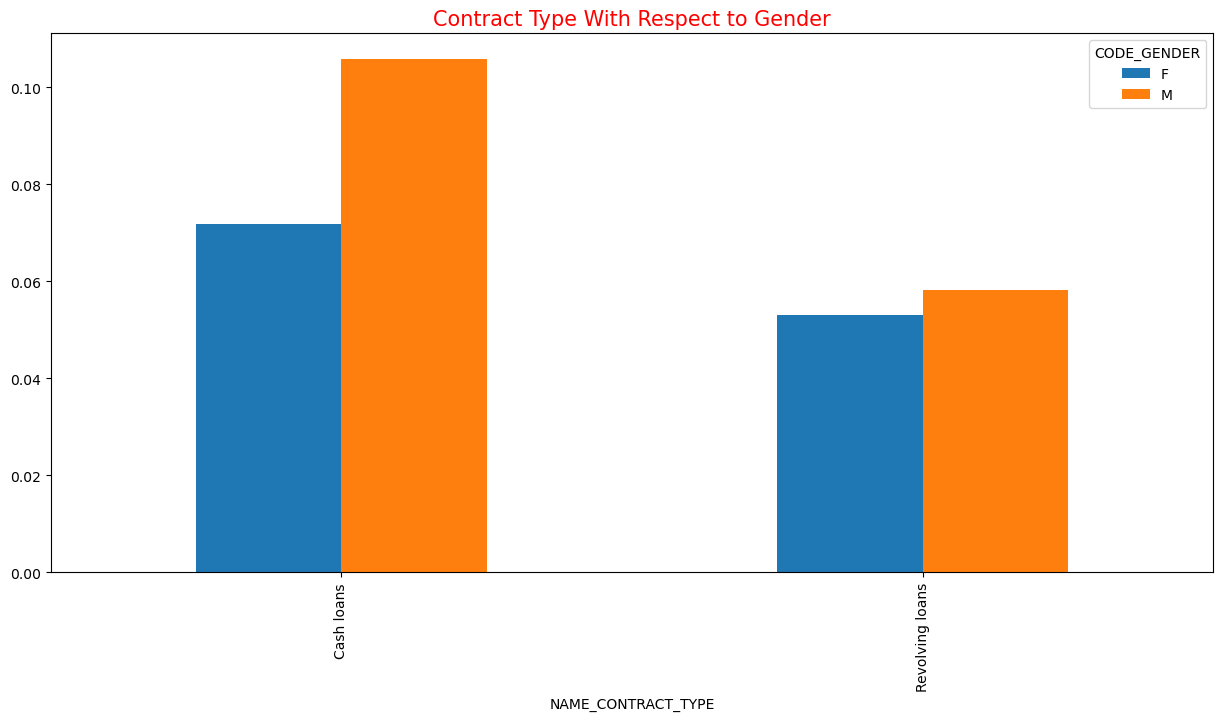

In [132]:
application_df.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER', aggfunc = 'mean').plot.bar(figsize = (15,7))
plt.title('Contract Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

- From the above plot we can see for both 'Cash loan' and 'Revolving loan' Males have taken more loans than Females.

## 4.Reading and understanding the previous data

### 4.1 Reading the previous data

 #####  Now lets check the 'previous_application.csv' containing  information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [133]:
previous_df=pd.read_csv('previous_application.csv')
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- Lets check the row , column sizes, data types and statistics for the previous data next

In [134]:
previous_df.shape

(1670214, 37)

In [135]:
previous_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [136]:
previous_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [137]:
previous_df.describe()  

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


- Similar to application data, let us check the null value percentage for all the columns of previous data 

In [138]:
null_percentage_by_columns_prev= null_values_percent(previous_df)
null_percentage_by_columns_prev

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

- Let us drop the columns having more than 40% null values for previous data as well

In [139]:
null_value_cols_more_than_40_prev = null_percentage_by_columns_prev[null_percentage_by_columns_prev.values >=40.00].index.tolist()
null_value_cols_more_than_40_prev

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [140]:
previous_df.drop(null_value_cols_more_than_40_prev, axis =1, inplace = True)
previous_df.shape

(1670214, 26)

- From the columns definition sheet, we can understand that the below columns are irrelevant to our analysis and thus we can drop them.                  WEEKDAY_APPR_PROCESS_START: 	On which day of the week did the client apply for previous application
 HOUR_APPR_PROCESS_START : 	Approximately at what day hour did the client apply for the previous application
 FLAG_LAST_APPL_PER_CONTRACT :	Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
 NFLAG_LAST_APPL_IN_DAY	: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice


In [141]:
irrev_cols=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
previous_df.drop(irrev_cols, axis =1, inplace = True)
previous_df.shape

(1670214, 22)

previous_df.head()

In [142]:
null_percentage_by_columns_prev= null_values_percent(previous_df)
null_percentage_by_columns_prev

AMT_GOODS_PRICE           23.08
AMT_ANNUITY               22.29
CNT_PAYMENT               22.29
PRODUCT_COMBINATION        0.02
AMT_CREDIT                 0.00
NAME_GOODS_CATEGORY        0.00
NAME_YIELD_GROUP           0.00
NAME_SELLER_INDUSTRY       0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
NAME_PRODUCT_TYPE          0.00
NAME_PORTFOLIO             0.00
SK_ID_PREV                 0.00
NAME_CLIENT_TYPE           0.00
SK_ID_CURR                 0.00
NAME_PAYMENT_TYPE          0.00
DAYS_DECISION              0.00
NAME_CONTRACT_STATUS       0.00
NAME_CASH_LOAN_PURPOSE     0.00
AMT_APPLICATION            0.00
NAME_CONTRACT_TYPE         0.00
CODE_REJECT_REASON         0.00
dtype: float64

- Based on the above data, we are going to impute missing values for 'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','PRODUCT_COMBINATION' columns. For the mentioned columns we will check the percentile distribution, min ,max and based on the data will impute the missing values

In [143]:
previous_df['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p)

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
25%        50841.00
50%       112320.00
75%       234000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: object

In [144]:
previous_df['AMT_GOODS_PRICE'].isnull().sum()

385515

In [145]:
AMT_GOODS_PRICE_MEDIAN= previous_df['AMT_GOODS_PRICE'].median()
AMT_GOODS_PRICE_MEDIAN

112320.0

- Imputing 'AMT_GOODS_PRICE' with median value

In [146]:
previous_df['AMT_GOODS_PRICE']=previous_df['AMT_GOODS_PRICE'].fillna(AMT_GOODS_PRICE_MEDIAN)
null_percentage_by_columns_prev= null_values_percent(previous_df)
null_percentage_by_columns_prev

AMT_ANNUITY               22.29
CNT_PAYMENT               22.29
PRODUCT_COMBINATION        0.02
AMT_CREDIT                 0.00
NAME_CLIENT_TYPE           0.00
NAME_YIELD_GROUP           0.00
NAME_SELLER_INDUSTRY       0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
NAME_PRODUCT_TYPE          0.00
NAME_PORTFOLIO             0.00
NAME_GOODS_CATEGORY        0.00
SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_PAYMENT_TYPE          0.00
DAYS_DECISION              0.00
NAME_CONTRACT_STATUS       0.00
NAME_CASH_LOAN_PURPOSE     0.00
AMT_GOODS_PRICE            0.00
AMT_APPLICATION            0.00
NAME_CONTRACT_TYPE         0.00
CODE_REJECT_REASON         0.00
dtype: float64

In [147]:
previous_df['AMT_ANNUITY'].describe().apply(lambda p: '%.2f' % p)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
25%         6321.78
50%        11250.00
75%        20658.42
max       418058.15
Name: AMT_ANNUITY, dtype: object

In [148]:
AMT_ANNUITY_MEDIAN= previous_df['AMT_ANNUITY'].median()
AMT_ANNUITY_MEDIAN
previous_df['AMT_ANNUITY']=previous_df['AMT_ANNUITY'].fillna(AMT_ANNUITY_MEDIAN)
null_percentage_by_columns_prev= null_values_percent(previous_df)
null_percentage_by_columns_prev

CNT_PAYMENT               22.29
PRODUCT_COMBINATION        0.02
AMT_CREDIT                 0.00
NAME_CLIENT_TYPE           0.00
NAME_YIELD_GROUP           0.00
NAME_SELLER_INDUSTRY       0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
NAME_PRODUCT_TYPE          0.00
NAME_PORTFOLIO             0.00
NAME_GOODS_CATEGORY        0.00
SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_PAYMENT_TYPE          0.00
DAYS_DECISION              0.00
NAME_CONTRACT_STATUS       0.00
NAME_CASH_LOAN_PURPOSE     0.00
AMT_GOODS_PRICE            0.00
AMT_APPLICATION            0.00
AMT_ANNUITY                0.00
NAME_CONTRACT_TYPE         0.00
CODE_REJECT_REASON         0.00
dtype: float64

In [149]:
previous_df['CNT_PAYMENT'].describe().apply(lambda p: '%.2f' % p)

count    1297984.00
mean          16.05
std           14.57
min            0.00
25%            6.00
50%           12.00
75%           24.00
max           84.00
Name: CNT_PAYMENT, dtype: object

In [150]:
previous_df['CNT_PAYMENT']= previous_df['CNT_PAYMENT'].fillna(0)
null_percentage_by_columns_prev= null_values_percent(previous_df)
null_percentage_by_columns_prev

PRODUCT_COMBINATION       0.02
AMT_CREDIT                0.00
NAME_CLIENT_TYPE          0.00
NAME_YIELD_GROUP          0.00
CNT_PAYMENT               0.00
NAME_SELLER_INDUSTRY      0.00
SELLERPLACE_AREA          0.00
CHANNEL_TYPE              0.00
NAME_PRODUCT_TYPE         0.00
NAME_PORTFOLIO            0.00
NAME_GOODS_CATEGORY       0.00
SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_PAYMENT_TYPE         0.00
DAYS_DECISION             0.00
NAME_CONTRACT_STATUS      0.00
NAME_CASH_LOAN_PURPOSE    0.00
AMT_GOODS_PRICE           0.00
AMT_APPLICATION           0.00
AMT_ANNUITY               0.00
NAME_CONTRACT_TYPE        0.00
CODE_REJECT_REASON        0.00
dtype: float64

In [151]:
previous_df['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [152]:
PRODUCT_COMBINATION_MODE=previous_df['PRODUCT_COMBINATION'].mode()[0]
PRODUCT_COMBINATION_MODE

'Cash'

In [153]:
previous_df['PRODUCT_COMBINATION']= previous_df['PRODUCT_COMBINATION'].fillna(PRODUCT_COMBINATION_MODE)
null_percentage_by_columns_prev= null_values_percent(previous_df)
null_percentage_by_columns_prev

AMT_CREDIT                0.0
SK_ID_PREV                0.0
NAME_CLIENT_TYPE          0.0
NAME_YIELD_GROUP          0.0
CNT_PAYMENT               0.0
NAME_SELLER_INDUSTRY      0.0
SELLERPLACE_AREA          0.0
CHANNEL_TYPE              0.0
NAME_PRODUCT_TYPE         0.0
NAME_PORTFOLIO            0.0
NAME_GOODS_CATEGORY       0.0
CODE_REJECT_REASON        0.0
SK_ID_CURR                0.0
NAME_PAYMENT_TYPE         0.0
DAYS_DECISION             0.0
NAME_CONTRACT_STATUS      0.0
NAME_CASH_LOAN_PURPOSE    0.0
AMT_GOODS_PRICE           0.0
AMT_APPLICATION           0.0
AMT_ANNUITY               0.0
NAME_CONTRACT_TYPE        0.0
PRODUCT_COMBINATION       0.0
dtype: float64

In [154]:
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,-8.806797e+02,3.139511e+02,1.247621e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,7.790997e+02,7.127443e+03,1.447588e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,-1.300000e+03,-1.000000e+00,0.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,-5.810000e+02,3.000000e+00,1.000000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,-2.800000e+02,8.200000e+01,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00,4.000000e+06,8.400000e+01


In [155]:
previous_df['DAYS_DECISION']=abs(previous_df['DAYS_DECISION'])

- For the DAYS_DECISION column, there are some negative values so let us substitute the values with absolute values

In [156]:
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,8.806797e+02,3.139511e+02,1.247621e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,7.790997e+02,7.127443e+03,1.447588e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,2.800000e+02,-1.000000e+00,0.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,3.000000e+00,1.000000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01


- Next, let us analyse the outliers present on the previous data.Based on the data above, the columns having very high difference between the percentiles are chosen for analysis

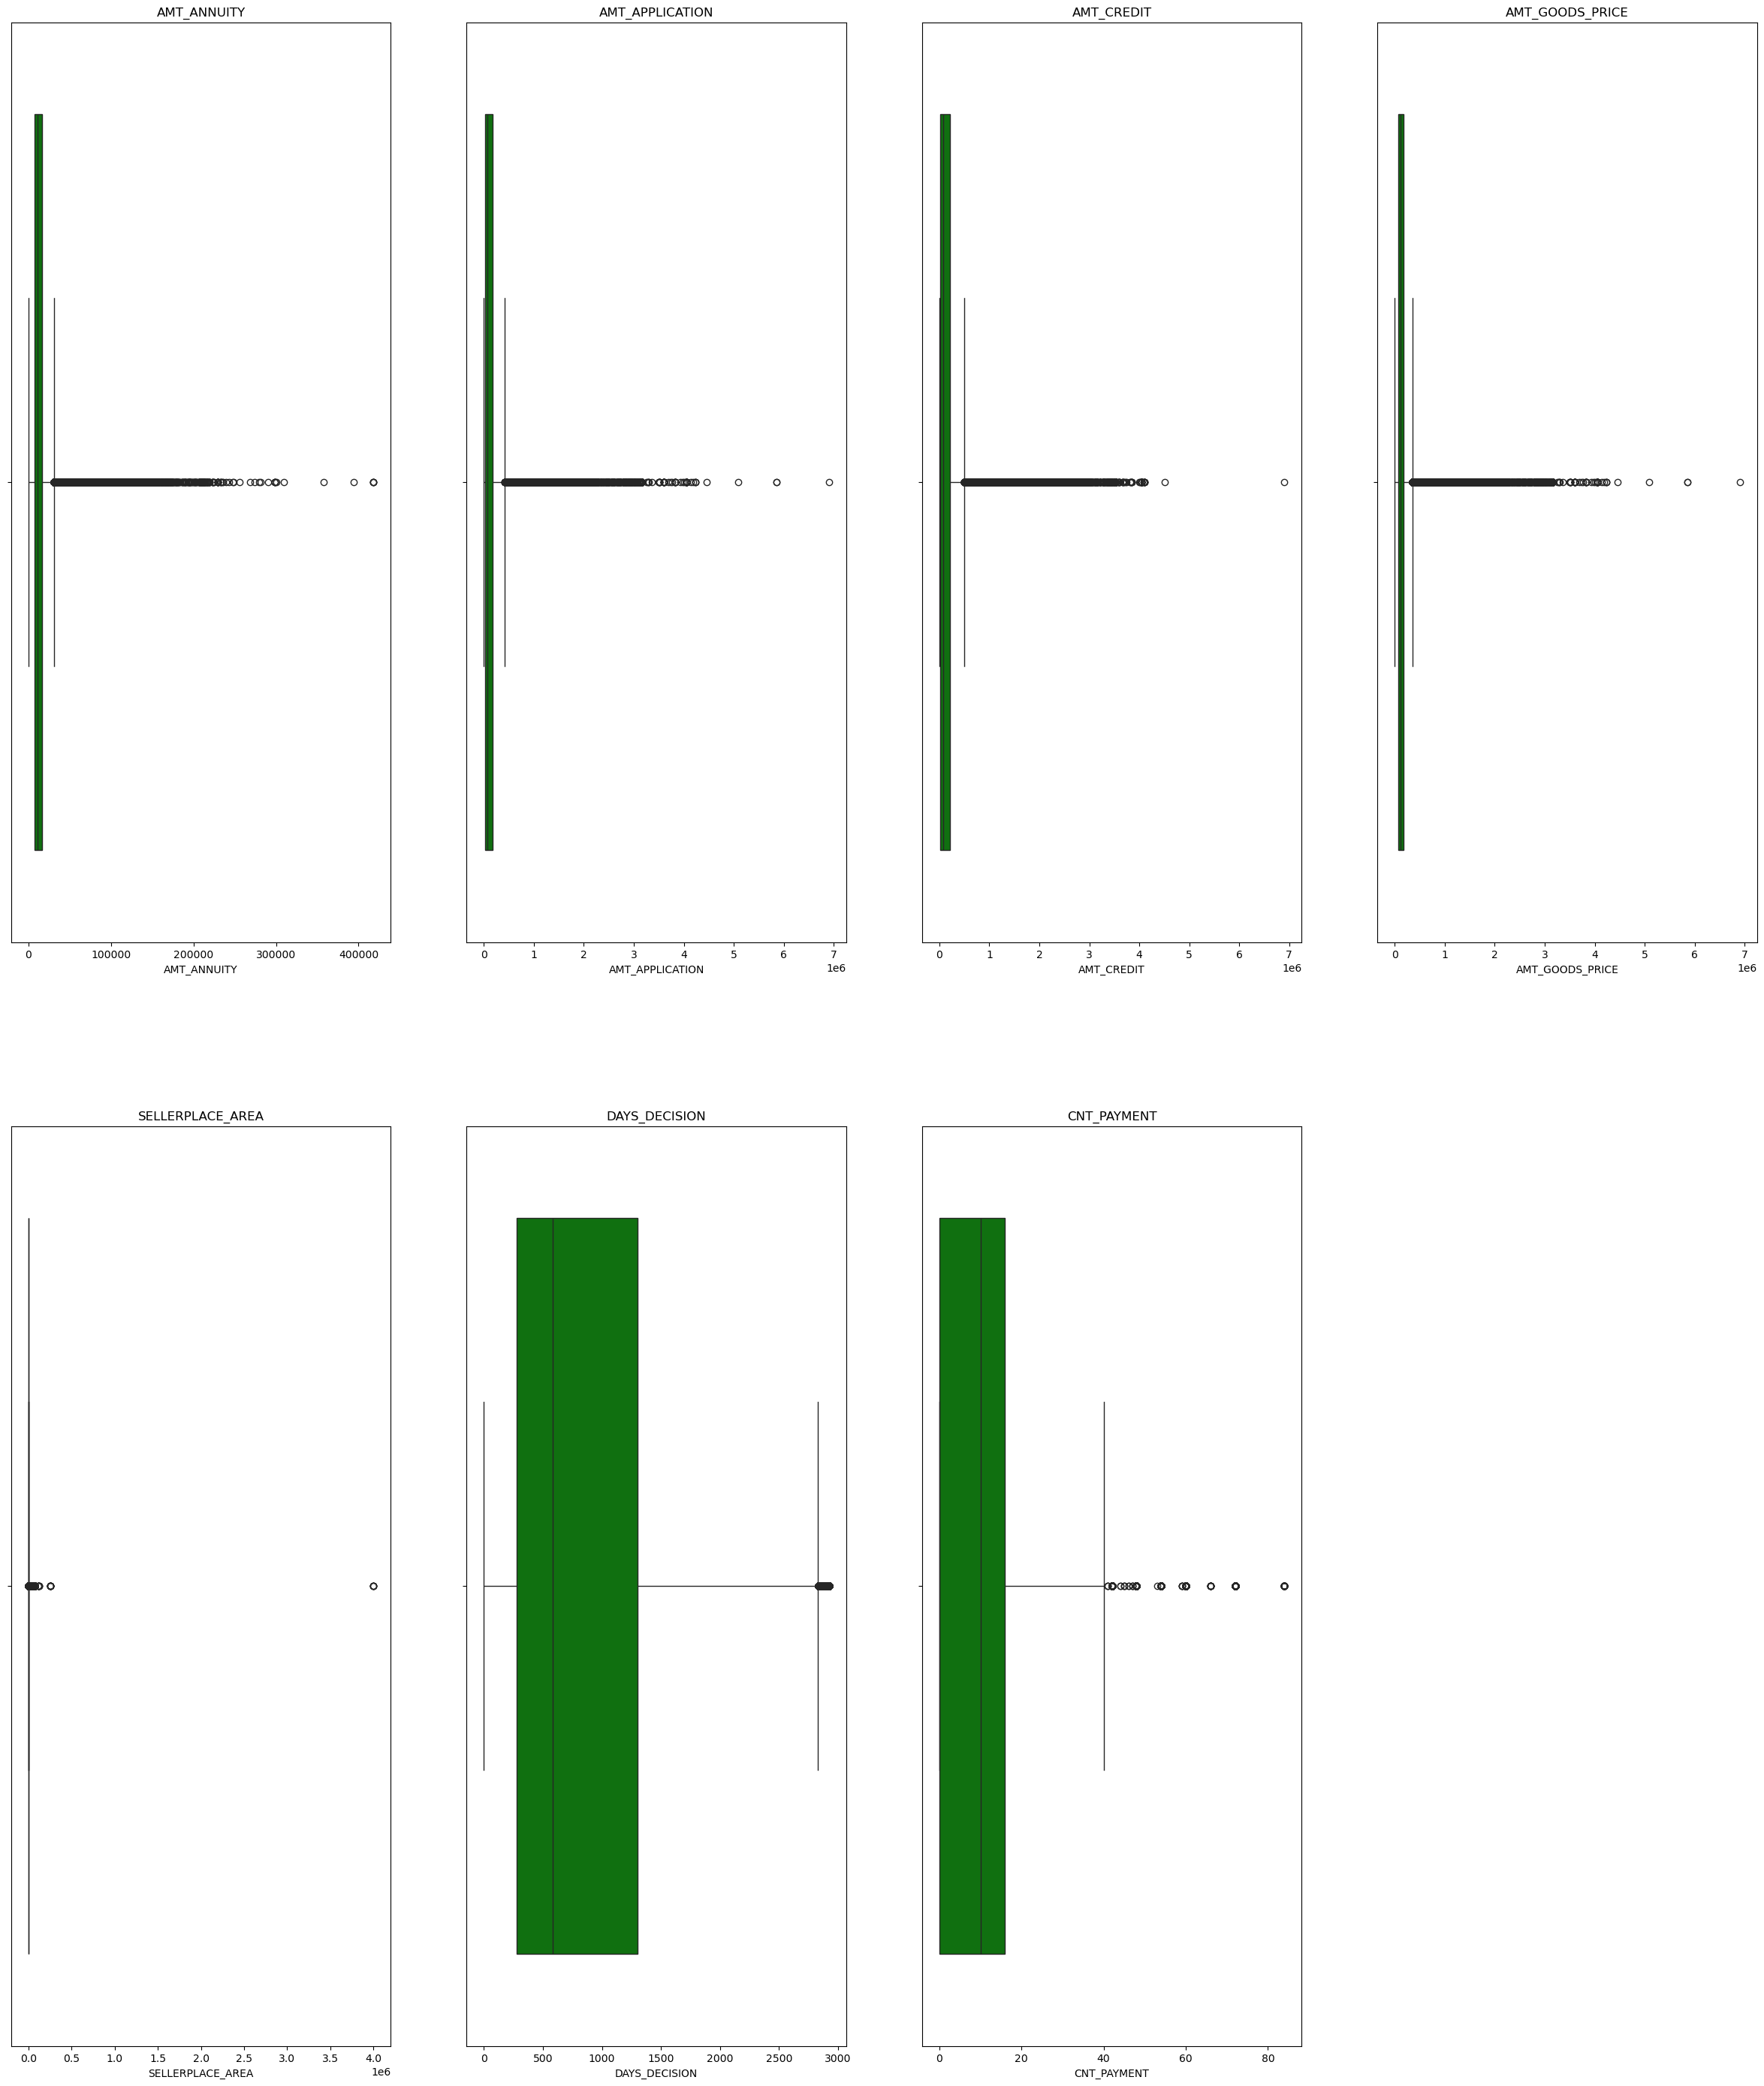

In [157]:
outlier_cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[30,35])
for index,col in enumerate(outlier_cols):
    plt.subplot(2,4,index+1)
    sns.boxplot(x = previous_df[col],  color = "green")
    plt.title(col)

- From the above plot we can see there are high number of outliers present for 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT'.There are some outliers for 'SELLERPLACE_AREA' and 'DAYS_DECISION' as well 

## 5. Merging and analysing the data sets

### 5.1 Merge application data and previous data

- Lets  join both the datasets based on SK_ID_CURR key and rename the columns for better readability

In [158]:
merged_df = application_df.merge(previous_df, left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,YEARS_ID_PUBLISH,YEARS_ID_PUBLISH_RANGE,AMT_ANNUITY_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3L-4L,2L-3L,4L-5L,25.920548,25-30,1.745205,0-5,5.808219,5-6,20K-25K,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,0-1L,1L-2L,52.180822,50-55,0.616438,0-5,6.93424

In [159]:

merged_df = merged_df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE',
                                       'AMT_CREDIT_x':'AMT_CREDIT',
                                       'AMT_ANNUITY_x':'AMT_ANNUITY',
                                       'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE',
                                       'NAME_CONTRACT_TYPE_y' : 'NAME_CONTRACT_TYPE_PREV',
                                       'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                                       'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                                       'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                                      }, axis=1)

merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,YEARS_ID_PUBLISH,YEARS_ID_PUBLISH_RANGE,AMT_ANNUITY_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3L-4L,2L-3L,4L-5L,25.920548,25-30,1.745205,0-5,5.808219,5-6,20K-25K,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,0-1L,1L-2L,52.180822,50-55,0.616438,0-5,6.9

- Let us create a separate dataframes containing defaulters and nondefaults data for further analysis 

In [160]:
merge_defaulter_df = merged_df[(merged_df.TARGET == 1)]
merge_defaulter_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,YEARS_ID_PUBLISH,YEARS_ID_PUBLISH_RANGE,AMT_ANNUITY_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,2.025,4.065975,24700.5,3.51,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3L-4L,2L-3L,4L-5L,25.920548,25-30,1.745205,0-5,5.808219,5-6,20K-25K,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
161,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,8L-9L,2L-3L,10L Above,47.895890,45-50,3.457534,0-5,2.819178,2-3,35K-40K,1472630,Revolving loans,22500.000,0.0,450000.0,112320.0,XAP,Approved,1172,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
162,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,8L-9L,2L-3L,10L Above,47.895890,45-50,3.457534,0-5,2.819178,2-3,35K-40K,2426800,Cash loans,11117.700,157500.0,157500.0,157500.0,XNA,Approved,1467,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,high,Cash X-Sell: high
163,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,8L-9L,2L-3L,10L Above,47.895890,45-50,3.457534,0-5,2.819178,2-3,35K-40K,1021215,Cash loans,31674.870,675000.0,744498.0,675000.0,XNA,Refused,1075,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low
164,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,

In [161]:
merge_nondefaulter_df = merged_df[(merged_df.TARGET == 0)]
merge_nondefaulter_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,YEARS_ID_PUBLISH,YEARS_ID_PUBLISH_RANGE,AMT_ANNUITY_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10L Above,2L-3L,10L Above,45.931507,45-50,3.254795,0-5,0.797260,0-1,35K-40K,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,0-1L,1L-2L,52.180822,50-55,0.616438,0-5,6.934247,6-7,0-10K,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
5,100006,0,Cash loans,F,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,1L-2L,3L-4L,52.068493,50-55,8.32

### 5.2 Categorical variables analysis for Merged data

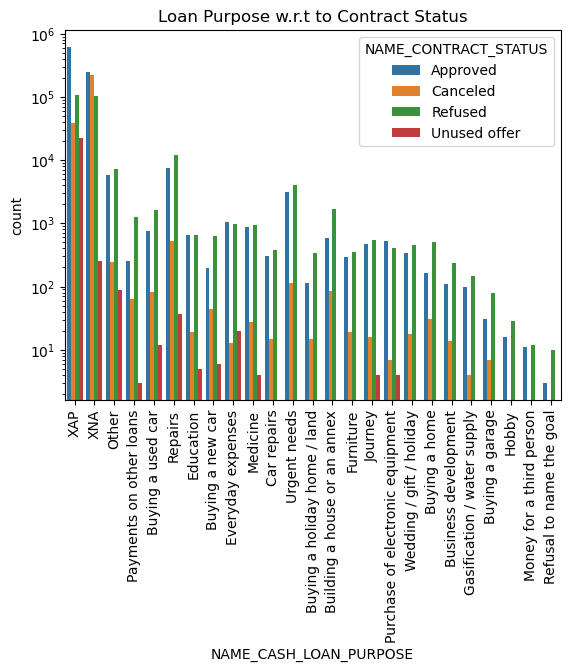

In [162]:
sns.countplot(data=merged_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Loan Purpose w.r.t to Contract Status')
plt.show()

- 'Repairs' category had the highest number of loan applications previously as well as highest amount of refusals and cancellations
- Most of the unused loan offers belong to 'others' category.

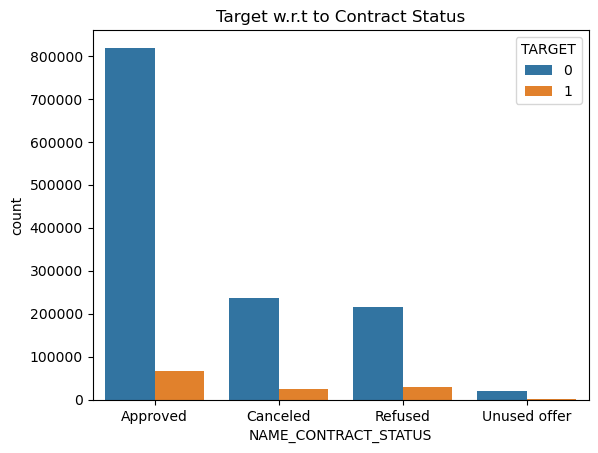

In [163]:
sns.countplot(data=merged_df, x='NAME_CONTRACT_STATUS',hue='TARGET')
plt.title('Target w.r.t to Contract Status')
plt.show()

- From the above plot we can see, even if previously the loans were cancelled or refused,more than 80-90% of those were non-defaulters in current application
  So Bank should reanalyze those data to offer a loan .

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

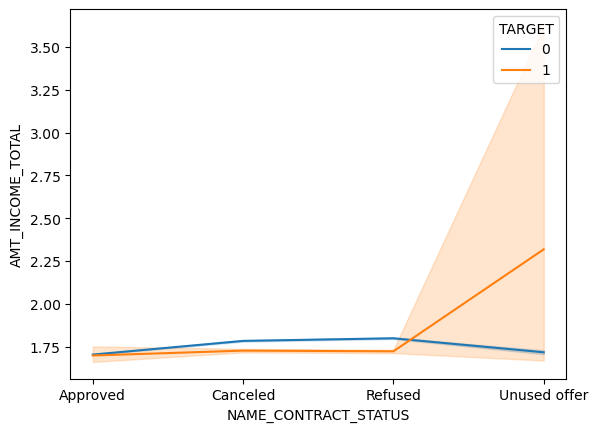

In [164]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',hue='TARGET')


Text(0.5, 1.0, 'Contract Status w.r.t to Education')

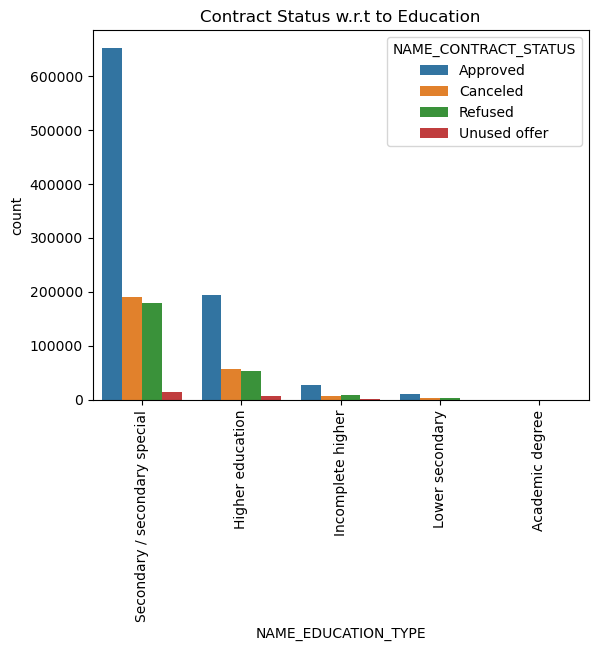

In [165]:
sns.countplot(x = 'NAME_EDUCATION_TYPE',hue = 'NAME_CONTRACT_STATUS',data = merged_df)
plt.xticks(rotation = 90)
plt.title('Contract Status w.r.t to Education')

- Most of the loans were approved for Secondary education previously

Text(0.5, 1.0, 'Contract Status w.r.t to Family Status')

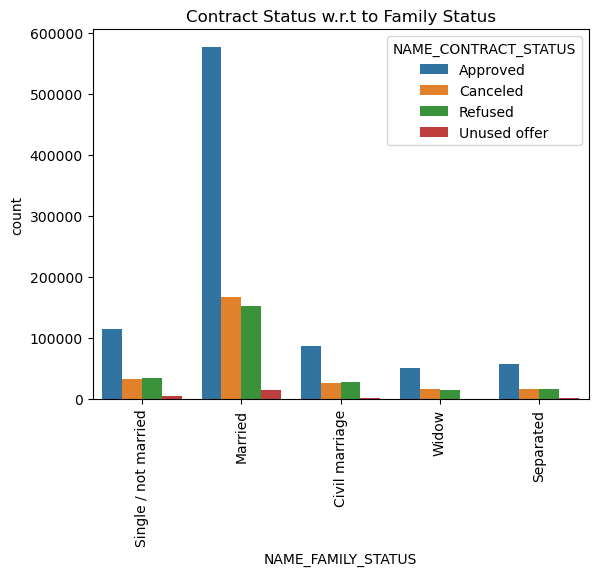

In [166]:
sns.countplot(x = 'NAME_FAMILY_STATUS',hue = 'NAME_CONTRACT_STATUS',data = merged_df)
plt.xticks(rotation = 90)
plt.title('Contract Status w.r.t to Family Status')

- Most of the approvals were given to married people previously.

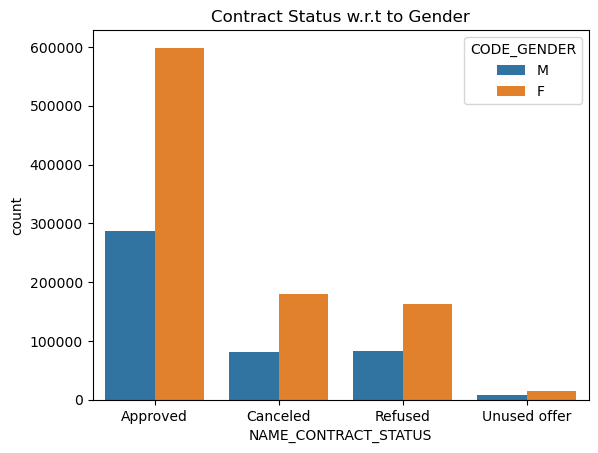

In [167]:
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", data = merged_df)
plt.title('Contract Status w.r.t to Gender')
plt.show()

- Female contracts got approved more compared to male.
- Female contracts also got refused more compare to male but that is nearly negligible and Less in numbers compare to approval.

###  5.3 Numerical variables analysis for Merged data

In [168]:
#Defaulters and Non-defaulters relations with amount

amt_cols = ['AMT_ANNUITY','AMT_INCOME_TOTAL']

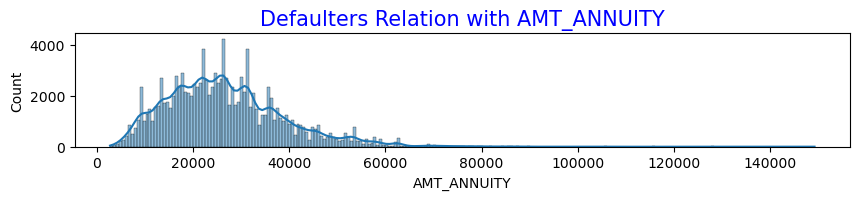

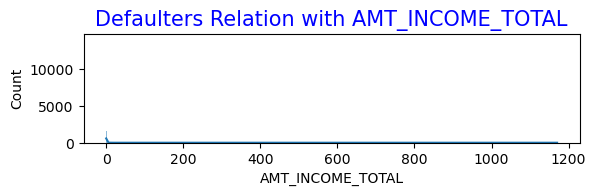

In [169]:
plt.figure(figsize = (10,5))
for index,col in enumerate(amt_cols):
    plt.subplot(3,1,index+1)
    sns.histplot(merge_defaulter_df[col], kde=True)
    plt.title("Defaulters Relation with "+ col, color = 'blue', fontsize = 15)
    plt.show()

- For defaulters annuity lies between 0-50,000.

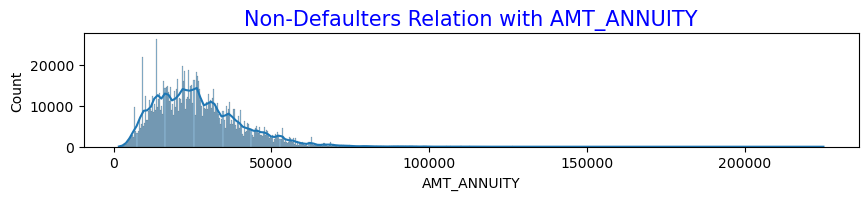

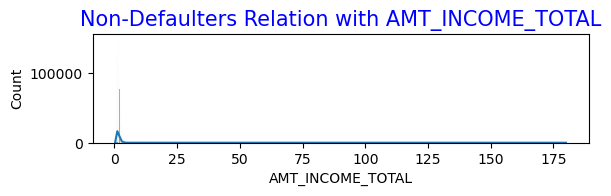

In [170]:
plt.figure(figsize = (10,5))
for index,col in enumerate(amt_cols):
    plt.subplot(3,1,index+1)
    sns.histplot(merge_nondefaulter_df[col], kde=True)
    plt.title("Non-Defaulters Relation with " + col, color = 'blue', fontsize = 15)
    plt.show()

- Most of the non-defaulters have annuity less that 50k and income less that 1 million

### 5.4 Further analysis of defaulters with variables

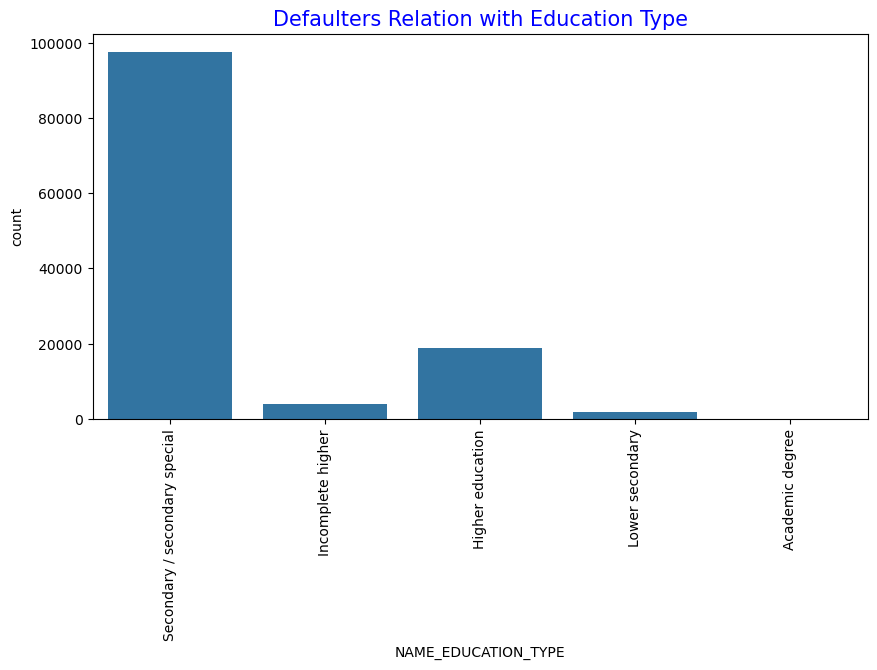

In [171]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_defaulter_df.NAME_EDUCATION_TYPE,data= merge_defaulter_df)
plt.title("Defaulters Relation with Education Type", color = 'blue', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

- Chances of Secondary/ secondary special people  education type becoming defaulters is more.

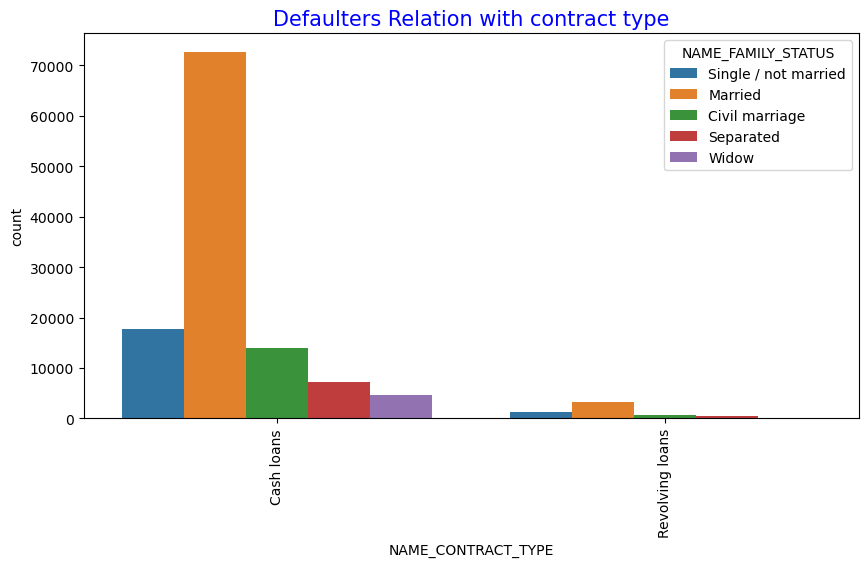

In [172]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_defaulter_df.NAME_CONTRACT_TYPE,hue = merge_defaulter_df.NAME_FAMILY_STATUS)
plt.title("Defaulters Relation with contract type", color = 'blue', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

- Most of the defaulters are married and have taken cash loans

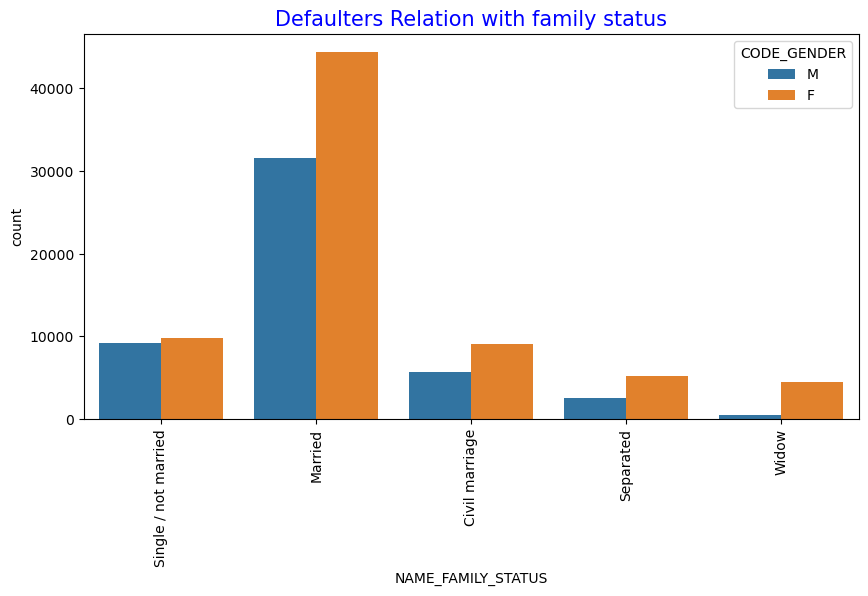

In [173]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_defaulter_df.NAME_FAMILY_STATUS,hue = merge_defaulter_df.CODE_GENDER,data = merge_defaulter_df)
plt.title("Defaulters Relation with family status", color = 'blue', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

- Married people are more likely to be defaulters

- Let's check the correlation for numeric columns for defaulters.

In [174]:
merge_corr_for_defaulters = merge_defaulter_df[['AMT_INCOME_TOTAL','AMT_ANNUITY', 'CNT_PAYMENT']]
merge_defaulter_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,YEARS_ID_PUBLISH,YEARS_ID_PUBLISH_RANGE,AMT_ANNUITY_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,2.025,4.065975,24700.5,3.51,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3L-4L,2L-3L,4L-5L,25.920548,25-30,1.745205,0-5,5.808219,5-6,20K-25K,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
161,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,8L-9L,2L-3L,10L Above,47.895890,45-50,3.457534,0-5,2.819178,2-3,35K-40K,1472630,Revolving loans,22500.000,0.0,450000.0,112320.0,XAP,Approved,1172,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
162,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,8L-9L,2L-3L,10L Above,47.895890,45-50,3.457534,0-5,2.819178,2-3,35K-40K,2426800,Cash loans,11117.700,157500.0,157500.0,157500.0,XNA,Approved,1467,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,high,Cash X-Sell: high
163,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0,0,0.0,0.0,0.0,2.0,0.0,4.0,8L-9L,2L-3L,10L Above,47.895890,45-50,3.457534,0-5,2.819178,2-3,35K-40K,1021215,Cash loans,31674.870,675000.0,744498.0,675000.0,XNA,Refused,1075,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low
164,100047,1,Cash loans,M,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,

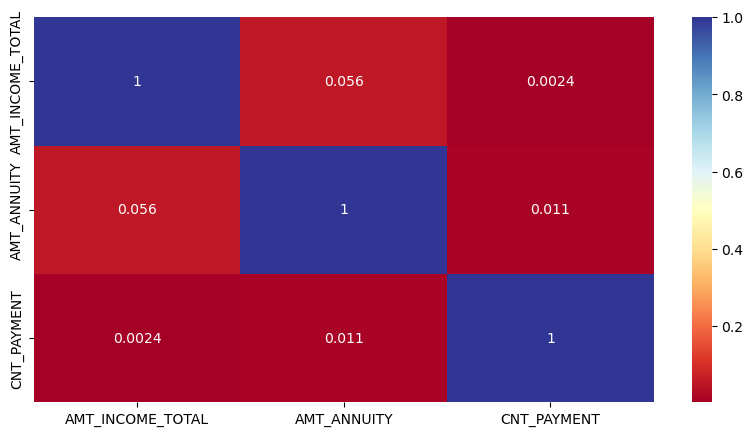

In [175]:
plt.figure(figsize = (10,5))
sns.heatmap(merge_corr_for_defaulters.corr(), cmap = 'RdYlBu', annot = True)
plt.show()

- AMT_INCOME_TOTAL,AMT_ANNUITY,CNT_PAYMENT do not have very high value of correlation for defaulters.

## 6. Conclusion and Recommendations

### 6.1 Conclusions: 




 - NAME_CONTRACT_TYPE: People who have taken cash loans are less likely to be defaulter considering the proportion.
    
- CODE_GENDER: Females have taken more loans.Females are less likely to be defaulters.
    
- NAME_TYPE_SUITE:Most of the people were unaccompanied while taking a loan, defaulting rate is around 9%.'The other B' category has high percentage of   defaulters. The people accompanied by children are less likely to default, but the number of loans taken is very less.
    
- NAME_INCOME_TYPE: Most of the loan were given to working professionals, defaulting rate for working professionals is 10%. The people in maternity       leave has high defaulting rate.Pensioners, Commercial Professionals have low default rates.
    
 - NAME_EDUCATION_TYPE: Academic degree and Higher education has lowest defauting rate of less than 5%.Female academic degree holders are paid highest     for both defaulter and nondefaulter category
    
- NAME_FAMILY_STATUS:Civil marriage has the highest defaulter rate.Married poeple have lower defaulting rate
    
- NAME_HOUSING_TYPE:Rented people has highest defaulting rate, whereas house owners,office apartment people have lower defaulting rate.
    
 - OCCUPATION_TYPE:Low skill labourers and drivers  have highest default rate. Accountants,Core staff, Managers have low rate of defaulters.
    
 - ORGANIZATION_TYPE: Clients with Trade Type 4 and Industry type 12 have less number of defaulters.Transport Type 3 has highest rate of defaulters but    number of loans given were low.
    
- CNT_CHILDREN: People having children 1-3 have low number of defaulters.
    
- AMT_CREDIT : Most of the defaulters belong where amount credit is less than 1.5 million
      
- AMT_INCOME_TOTAL : Most of the non-defaulters have annuity less that 50k and income less that 1 million
      
- NAME_CONTRACT_STATUS : More than 80-90% of those were non-defaulters in current application So Bank should reanalyze those data to offer a loan       .The previous offers which were unused in current application have maximum number of defaulters despite having high income

### 6.2 Recommendations: 

- Recommendations for Applicants who should be targeted/preferred based on the insights : 
  - Applicants having own housing apartment
  - Females should be preferred over males.
  - Applicants having higher education.
  - Applicants who are married and having children 1-3 
  - widows 
  - Applicants having credit amount less that 1.5 million 
  - Applicants having annuity less that 50K 
  - Applicants having income less that 1 million
  - Applicants who have been Previously refused, cancelled offers should be reassessed for loan offers.

- Recommendations for Applicants who should be avoided: 

  - Applicants who are single/civil married should be less targeted
  - Low skill labourers/drivers should be avoided
  - Applicants who have previous offer usused / rejected should be avoided
  - Applicants having low education level should be avoided